# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

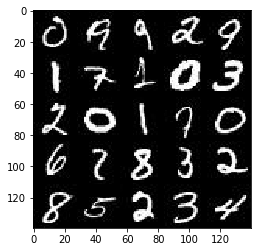

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

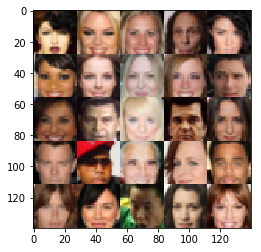

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='lr')
    return inputs_real, inputs_z, learning_rate
    #return None, None, None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.1
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28*28*channels
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha*x1, x1)
        # Now is 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha*bn2, bn2)
        # Now is 7x7x128
        
    
        # Flatten
        #flatten = tf.contrib.layers.flatten(relu2)
        flatten = tf.reshape(relu2, (-1, 7*7*128))
        
        # Fully connected layer
        logits = tf.layers.dense(flatten, 1)
        output = tf.sigmoid(logits)
        
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    
    alpha = 0.1
    reuse = not is_train
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        x = tf.layers.dense(z, 7*7*512)
        
        # Reshape
        x = tf.reshape(x, [-1, 7, 7, 512])
        #x2 = tf.contrib.layers.flatten(x2)
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha*x, x)
        # Now is 7x7x128
        
        x = tf.layers.conv2d_transpose(x, 256, 5, strides=2, padding='same')
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha*x, x)
        # Now is 14*14*64
        
        x = tf.layers.conv2d_transpose(x, 128, 5, strides=2, padding='same')
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha*x, x)
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x, out_channel_dim, 5, strides=1, padding='same')
        # Now is 28*28*3
        
        output = tf.tanh(logits)
        
        
    return output
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    n_samples, width, height, channels = data_shape
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    show_every = 100
    print_every = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images *= 2
                # TODO: Train Model
                steps += 1
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})

                if steps % show_every == 0:
                    n_images = 25
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2... Discriminator Loss: 0.7915... Generator Loss: 0.8069
Epoch 0/2... Discriminator Loss: 0.1614... Generator Loss: 2.4756
Epoch 0/2... Discriminator Loss: 0.7085... Generator Loss: 0.8313
Epoch 0/2... Discriminator Loss: 0.1159... Generator Loss: 2.8598
Epoch 0/2... Discriminator Loss: 0.4197... Generator Loss: 2.7998
Epoch 0/2... Discriminator Loss: 0.6460... Generator Loss: 1.0456
Epoch 0/2... Discriminator Loss: 2.3022... Generator Loss: 0.1712
Epoch 0/2... Discriminator Loss: 1.1820... Generator Loss: 0.7966
Epoch 0/2... Discriminator Loss: 0.6166... Generator Loss: 1.9547


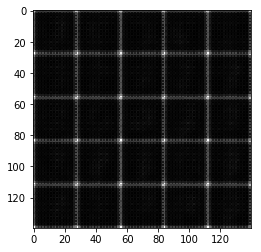

Epoch 0/2... Discriminator Loss: 0.1278... Generator Loss: 3.1081
Epoch 0/2... Discriminator Loss: 0.0888... Generator Loss: 3.1799
Epoch 0/2... Discriminator Loss: 0.4409... Generator Loss: 1.4803
Epoch 0/2... Discriminator Loss: 0.8070... Generator Loss: 1.1265
Epoch 0/2... Discriminator Loss: 1.2517... Generator Loss: 0.7560
Epoch 0/2... Discriminator Loss: 1.4963... Generator Loss: 0.5740
Epoch 0/2... Discriminator Loss: 1.4172... Generator Loss: 0.6745
Epoch 0/2... Discriminator Loss: 1.4680... Generator Loss: 0.5895
Epoch 0/2... Discriminator Loss: 1.5628... Generator Loss: 0.5183
Epoch 0/2... Discriminator Loss: 1.4250... Generator Loss: 0.7174


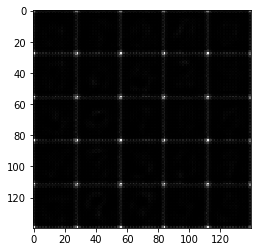

Epoch 0/2... Discriminator Loss: 1.4967... Generator Loss: 0.6505
Epoch 0/2... Discriminator Loss: 1.5208... Generator Loss: 0.6342
Epoch 0/2... Discriminator Loss: 1.6361... Generator Loss: 0.5348
Epoch 0/2... Discriminator Loss: 1.6785... Generator Loss: 0.5734
Epoch 0/2... Discriminator Loss: 1.4662... Generator Loss: 0.5743
Epoch 0/2... Discriminator Loss: 1.3840... Generator Loss: 0.6305
Epoch 0/2... Discriminator Loss: 1.3621... Generator Loss: 0.6930
Epoch 0/2... Discriminator Loss: 1.4606... Generator Loss: 0.6714
Epoch 0/2... Discriminator Loss: 1.3653... Generator Loss: 0.6308
Epoch 0/2... Discriminator Loss: 1.4449... Generator Loss: 0.5704


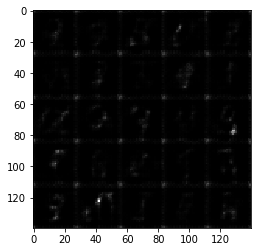

Epoch 0/2... Discriminator Loss: 1.4298... Generator Loss: 0.6121
Epoch 0/2... Discriminator Loss: 1.2623... Generator Loss: 0.6721
Epoch 0/2... Discriminator Loss: 1.3383... Generator Loss: 0.6492
Epoch 0/2... Discriminator Loss: 1.4671... Generator Loss: 0.5786
Epoch 0/2... Discriminator Loss: 1.4101... Generator Loss: 0.6565
Epoch 0/2... Discriminator Loss: 1.3663... Generator Loss: 0.5978
Epoch 0/2... Discriminator Loss: 1.3272... Generator Loss: 0.7125
Epoch 0/2... Discriminator Loss: 1.2682... Generator Loss: 0.7356
Epoch 0/2... Discriminator Loss: 1.3279... Generator Loss: 0.5921
Epoch 0/2... Discriminator Loss: 1.3217... Generator Loss: 0.7130


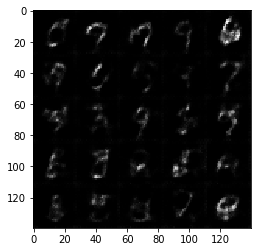

Epoch 0/2... Discriminator Loss: 1.3643... Generator Loss: 0.4977
Epoch 0/2... Discriminator Loss: 1.3542... Generator Loss: 0.7039
Epoch 0/2... Discriminator Loss: 1.4869... Generator Loss: 0.4863
Epoch 0/2... Discriminator Loss: 1.4731... Generator Loss: 0.4969
Epoch 0/2... Discriminator Loss: 1.2608... Generator Loss: 0.6781
Epoch 0/2... Discriminator Loss: 1.4590... Generator Loss: 0.5373
Epoch 0/2... Discriminator Loss: 1.3865... Generator Loss: 0.6337
Epoch 0/2... Discriminator Loss: 1.1562... Generator Loss: 0.7639
Epoch 0/2... Discriminator Loss: 1.3574... Generator Loss: 0.5817
Epoch 0/2... Discriminator Loss: 1.4680... Generator Loss: 0.5091


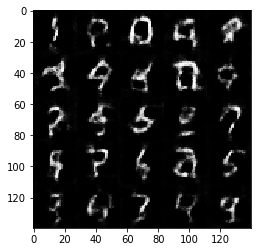

Epoch 0/2... Discriminator Loss: 1.3345... Generator Loss: 0.8235
Epoch 0/2... Discriminator Loss: 1.5193... Generator Loss: 0.4413
Epoch 0/2... Discriminator Loss: 1.3410... Generator Loss: 0.7568
Epoch 0/2... Discriminator Loss: 1.2620... Generator Loss: 0.7197
Epoch 0/2... Discriminator Loss: 1.2870... Generator Loss: 0.8904
Epoch 0/2... Discriminator Loss: 1.3430... Generator Loss: 0.5540
Epoch 0/2... Discriminator Loss: 1.2700... Generator Loss: 0.8387
Epoch 0/2... Discriminator Loss: 1.3510... Generator Loss: 0.7241
Epoch 0/2... Discriminator Loss: 1.2987... Generator Loss: 0.7798
Epoch 0/2... Discriminator Loss: 1.2219... Generator Loss: 0.7199


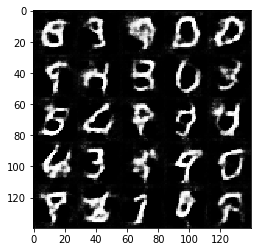

Epoch 0/2... Discriminator Loss: 1.4192... Generator Loss: 0.6424
Epoch 0/2... Discriminator Loss: 1.2923... Generator Loss: 0.7783
Epoch 0/2... Discriminator Loss: 1.4738... Generator Loss: 0.5856
Epoch 0/2... Discriminator Loss: 1.4128... Generator Loss: 0.7154
Epoch 0/2... Discriminator Loss: 1.2671... Generator Loss: 0.6734
Epoch 0/2... Discriminator Loss: 1.3265... Generator Loss: 0.7817
Epoch 0/2... Discriminator Loss: 1.3178... Generator Loss: 0.6755
Epoch 0/2... Discriminator Loss: 1.3529... Generator Loss: 0.8055
Epoch 0/2... Discriminator Loss: 1.2692... Generator Loss: 0.6718
Epoch 0/2... Discriminator Loss: 1.2678... Generator Loss: 0.6203


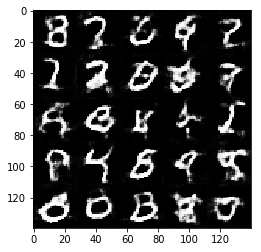

Epoch 0/2... Discriminator Loss: 1.3723... Generator Loss: 0.6852
Epoch 0/2... Discriminator Loss: 1.3477... Generator Loss: 0.7860
Epoch 0/2... Discriminator Loss: 1.3289... Generator Loss: 0.7484
Epoch 0/2... Discriminator Loss: 1.4517... Generator Loss: 0.6703
Epoch 0/2... Discriminator Loss: 1.2888... Generator Loss: 0.6171
Epoch 0/2... Discriminator Loss: 1.3689... Generator Loss: 0.7691
Epoch 0/2... Discriminator Loss: 1.3509... Generator Loss: 0.5129
Epoch 0/2... Discriminator Loss: 1.3160... Generator Loss: 0.6080
Epoch 0/2... Discriminator Loss: 1.3864... Generator Loss: 0.6920
Epoch 0/2... Discriminator Loss: 1.2335... Generator Loss: 0.9283


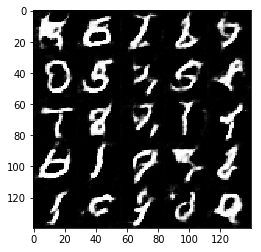

Epoch 0/2... Discriminator Loss: 1.3388... Generator Loss: 0.6918
Epoch 0/2... Discriminator Loss: 1.4128... Generator Loss: 0.4794
Epoch 0/2... Discriminator Loss: 1.2394... Generator Loss: 0.7534
Epoch 0/2... Discriminator Loss: 1.4768... Generator Loss: 0.4820
Epoch 0/2... Discriminator Loss: 1.3675... Generator Loss: 0.7077
Epoch 0/2... Discriminator Loss: 1.3175... Generator Loss: 0.6988
Epoch 0/2... Discriminator Loss: 1.3364... Generator Loss: 0.7174
Epoch 0/2... Discriminator Loss: 1.3343... Generator Loss: 0.5189
Epoch 0/2... Discriminator Loss: 1.5085... Generator Loss: 0.5896
Epoch 0/2... Discriminator Loss: 1.3652... Generator Loss: 0.6239


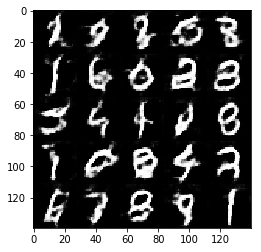

Epoch 0/2... Discriminator Loss: 1.4339... Generator Loss: 0.4745
Epoch 0/2... Discriminator Loss: 1.2640... Generator Loss: 0.6755
Epoch 0/2... Discriminator Loss: 1.3155... Generator Loss: 0.6609
Epoch 0/2... Discriminator Loss: 1.3729... Generator Loss: 0.5634
Epoch 0/2... Discriminator Loss: 1.4232... Generator Loss: 0.5463
Epoch 0/2... Discriminator Loss: 1.4639... Generator Loss: 0.5425
Epoch 0/2... Discriminator Loss: 1.3949... Generator Loss: 0.7050
Epoch 0/2... Discriminator Loss: 1.4160... Generator Loss: 0.8898
Epoch 0/2... Discriminator Loss: 1.2964... Generator Loss: 0.8948
Epoch 0/2... Discriminator Loss: 1.3081... Generator Loss: 0.6523


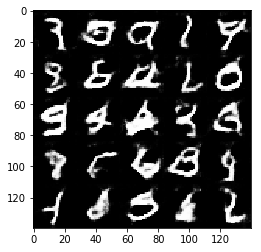

Epoch 0/2... Discriminator Loss: 1.3082... Generator Loss: 0.6223
Epoch 0/2... Discriminator Loss: 1.3754... Generator Loss: 0.6048
Epoch 0/2... Discriminator Loss: 1.4180... Generator Loss: 0.6764
Epoch 0/2... Discriminator Loss: 1.3111... Generator Loss: 0.5766
Epoch 0/2... Discriminator Loss: 1.2957... Generator Loss: 0.7675
Epoch 0/2... Discriminator Loss: 1.3116... Generator Loss: 0.5918
Epoch 0/2... Discriminator Loss: 1.4579... Generator Loss: 0.4101
Epoch 0/2... Discriminator Loss: 1.3445... Generator Loss: 0.6431
Epoch 0/2... Discriminator Loss: 1.1972... Generator Loss: 0.8127
Epoch 0/2... Discriminator Loss: 1.2364... Generator Loss: 0.7210


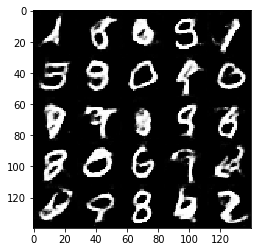

Epoch 0/2... Discriminator Loss: 1.2544... Generator Loss: 0.8070
Epoch 0/2... Discriminator Loss: 1.3655... Generator Loss: 0.5077
Epoch 0/2... Discriminator Loss: 1.1900... Generator Loss: 0.8212
Epoch 0/2... Discriminator Loss: 1.1678... Generator Loss: 0.8119
Epoch 0/2... Discriminator Loss: 1.3204... Generator Loss: 0.6531
Epoch 0/2... Discriminator Loss: 1.2973... Generator Loss: 0.7246
Epoch 0/2... Discriminator Loss: 1.3198... Generator Loss: 0.7220
Epoch 0/2... Discriminator Loss: 1.2195... Generator Loss: 0.7225
Epoch 0/2... Discriminator Loss: 1.3399... Generator Loss: 0.7865
Epoch 0/2... Discriminator Loss: 1.2523... Generator Loss: 0.5917


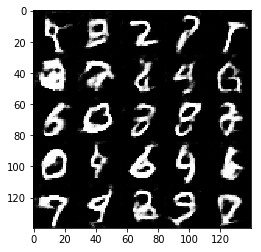

Epoch 0/2... Discriminator Loss: 1.2564... Generator Loss: 0.6179
Epoch 0/2... Discriminator Loss: 1.3125... Generator Loss: 0.8647
Epoch 0/2... Discriminator Loss: 1.2459... Generator Loss: 0.7535
Epoch 0/2... Discriminator Loss: 1.2597... Generator Loss: 0.9924
Epoch 0/2... Discriminator Loss: 1.2451... Generator Loss: 1.0351
Epoch 0/2... Discriminator Loss: 1.2962... Generator Loss: 0.6196
Epoch 0/2... Discriminator Loss: 1.2453... Generator Loss: 0.6635
Epoch 0/2... Discriminator Loss: 1.2491... Generator Loss: 0.6168
Epoch 0/2... Discriminator Loss: 1.1747... Generator Loss: 0.9025
Epoch 0/2... Discriminator Loss: 1.2841... Generator Loss: 0.7236


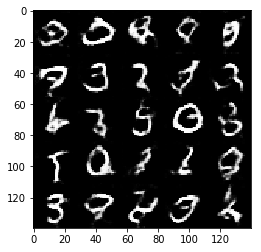

Epoch 0/2... Discriminator Loss: 1.2665... Generator Loss: 0.8949
Epoch 0/2... Discriminator Loss: 1.2466... Generator Loss: 0.5554
Epoch 0/2... Discriminator Loss: 1.2785... Generator Loss: 0.7198
Epoch 0/2... Discriminator Loss: 1.3017... Generator Loss: 0.5288
Epoch 0/2... Discriminator Loss: 1.3398... Generator Loss: 0.4986
Epoch 0/2... Discriminator Loss: 1.1891... Generator Loss: 0.7368
Epoch 0/2... Discriminator Loss: 1.3596... Generator Loss: 0.5193
Epoch 0/2... Discriminator Loss: 1.3656... Generator Loss: 0.4587
Epoch 0/2... Discriminator Loss: 1.1562... Generator Loss: 0.7027
Epoch 0/2... Discriminator Loss: 1.2842... Generator Loss: 0.5485


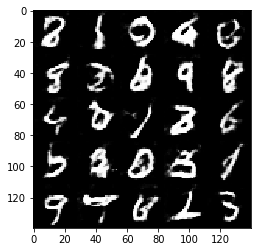

Epoch 0/2... Discriminator Loss: 1.2913... Generator Loss: 0.7132
Epoch 0/2... Discriminator Loss: 1.3501... Generator Loss: 0.6299
Epoch 0/2... Discriminator Loss: 1.1581... Generator Loss: 0.9902
Epoch 0/2... Discriminator Loss: 1.1732... Generator Loss: 0.7995
Epoch 0/2... Discriminator Loss: 1.3873... Generator Loss: 0.4406
Epoch 0/2... Discriminator Loss: 1.2600... Generator Loss: 0.8361
Epoch 0/2... Discriminator Loss: 1.2669... Generator Loss: 0.5988
Epoch 0/2... Discriminator Loss: 1.1840... Generator Loss: 0.8035
Epoch 0/2... Discriminator Loss: 1.4007... Generator Loss: 0.5375
Epoch 0/2... Discriminator Loss: 1.1376... Generator Loss: 0.7995


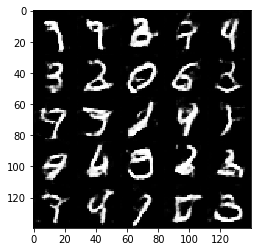

Epoch 0/2... Discriminator Loss: 1.2279... Generator Loss: 0.6621
Epoch 0/2... Discriminator Loss: 1.3214... Generator Loss: 0.7852
Epoch 0/2... Discriminator Loss: 1.3279... Generator Loss: 0.8066
Epoch 0/2... Discriminator Loss: 1.2236... Generator Loss: 1.0625
Epoch 0/2... Discriminator Loss: 1.4764... Generator Loss: 0.3864
Epoch 0/2... Discriminator Loss: 1.3124... Generator Loss: 0.5552
Epoch 0/2... Discriminator Loss: 1.3544... Generator Loss: 1.1573
Epoch 0/2... Discriminator Loss: 1.4193... Generator Loss: 0.4621
Epoch 0/2... Discriminator Loss: 1.1954... Generator Loss: 0.9433
Epoch 0/2... Discriminator Loss: 1.2532... Generator Loss: 0.6414


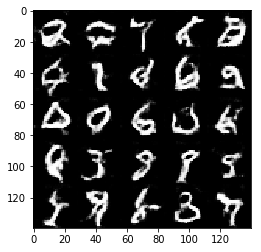

Epoch 0/2... Discriminator Loss: 1.1954... Generator Loss: 0.6971
Epoch 0/2... Discriminator Loss: 1.2729... Generator Loss: 0.6331
Epoch 0/2... Discriminator Loss: 1.1174... Generator Loss: 0.7485
Epoch 0/2... Discriminator Loss: 1.3075... Generator Loss: 0.5769
Epoch 0/2... Discriminator Loss: 1.2194... Generator Loss: 0.5884
Epoch 0/2... Discriminator Loss: 1.2188... Generator Loss: 0.6415
Epoch 0/2... Discriminator Loss: 1.2128... Generator Loss: 0.7245
Epoch 0/2... Discriminator Loss: 1.1589... Generator Loss: 0.6222
Epoch 0/2... Discriminator Loss: 1.3074... Generator Loss: 0.7233
Epoch 0/2... Discriminator Loss: 1.2528... Generator Loss: 0.6004


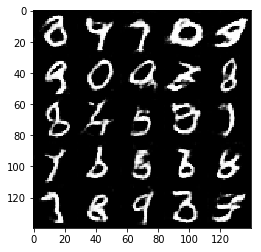

Epoch 0/2... Discriminator Loss: 1.1420... Generator Loss: 0.7948
Epoch 0/2... Discriminator Loss: 1.2786... Generator Loss: 0.8103
Epoch 0/2... Discriminator Loss: 1.2052... Generator Loss: 0.6733
Epoch 0/2... Discriminator Loss: 1.1394... Generator Loss: 0.7203
Epoch 0/2... Discriminator Loss: 1.0450... Generator Loss: 0.7759
Epoch 0/2... Discriminator Loss: 1.2480... Generator Loss: 0.6526
Epoch 0/2... Discriminator Loss: 1.2447... Generator Loss: 0.5683
Epoch 0/2... Discriminator Loss: 1.0697... Generator Loss: 0.8349
Epoch 0/2... Discriminator Loss: 1.0844... Generator Loss: 0.9002
Epoch 0/2... Discriminator Loss: 1.1621... Generator Loss: 1.1785


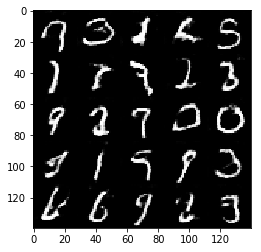

Epoch 0/2... Discriminator Loss: 1.2687... Generator Loss: 0.5460
Epoch 0/2... Discriminator Loss: 1.1252... Generator Loss: 0.8906
Epoch 0/2... Discriminator Loss: 1.2583... Generator Loss: 0.8363
Epoch 0/2... Discriminator Loss: 1.1750... Generator Loss: 0.5377
Epoch 0/2... Discriminator Loss: 1.1231... Generator Loss: 0.8282
Epoch 0/2... Discriminator Loss: 1.2969... Generator Loss: 0.5078
Epoch 0/2... Discriminator Loss: 1.2302... Generator Loss: 1.1172
Epoch 0/2... Discriminator Loss: 1.2973... Generator Loss: 1.1013
Epoch 1/2... Discriminator Loss: 1.2439... Generator Loss: 0.6432
Epoch 1/2... Discriminator Loss: 1.2295... Generator Loss: 0.6292


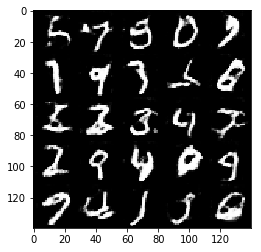

Epoch 1/2... Discriminator Loss: 1.2438... Generator Loss: 0.5888
Epoch 1/2... Discriminator Loss: 1.2244... Generator Loss: 0.6809
Epoch 1/2... Discriminator Loss: 1.2550... Generator Loss: 0.7029
Epoch 1/2... Discriminator Loss: 1.3319... Generator Loss: 1.0096
Epoch 1/2... Discriminator Loss: 1.5002... Generator Loss: 0.3304
Epoch 1/2... Discriminator Loss: 1.1752... Generator Loss: 0.5721
Epoch 1/2... Discriminator Loss: 1.3545... Generator Loss: 0.6004
Epoch 1/2... Discriminator Loss: 1.1677... Generator Loss: 0.7217
Epoch 1/2... Discriminator Loss: 1.0950... Generator Loss: 0.9328
Epoch 1/2... Discriminator Loss: 1.0583... Generator Loss: 1.0558


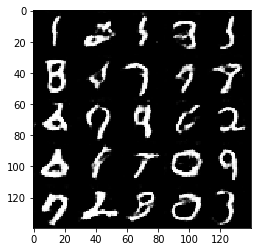

Epoch 1/2... Discriminator Loss: 1.3222... Generator Loss: 0.5370
Epoch 1/2... Discriminator Loss: 1.2564... Generator Loss: 0.5033
Epoch 1/2... Discriminator Loss: 0.9869... Generator Loss: 1.1168
Epoch 1/2... Discriminator Loss: 1.1587... Generator Loss: 0.6932
Epoch 1/2... Discriminator Loss: 1.2784... Generator Loss: 0.4820
Epoch 1/2... Discriminator Loss: 1.3497... Generator Loss: 0.6317
Epoch 1/2... Discriminator Loss: 1.2340... Generator Loss: 0.7689
Epoch 1/2... Discriminator Loss: 1.1683... Generator Loss: 0.6031
Epoch 1/2... Discriminator Loss: 1.1789... Generator Loss: 1.2156
Epoch 1/2... Discriminator Loss: 0.9948... Generator Loss: 0.9163


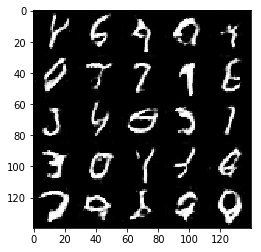

Epoch 1/2... Discriminator Loss: 1.1939... Generator Loss: 0.5889
Epoch 1/2... Discriminator Loss: 1.2976... Generator Loss: 0.4437
Epoch 1/2... Discriminator Loss: 1.2248... Generator Loss: 0.7197
Epoch 1/2... Discriminator Loss: 1.4392... Generator Loss: 0.3807
Epoch 1/2... Discriminator Loss: 1.1464... Generator Loss: 0.8250
Epoch 1/2... Discriminator Loss: 1.2527... Generator Loss: 0.5123
Epoch 1/2... Discriminator Loss: 1.2346... Generator Loss: 0.7329
Epoch 1/2... Discriminator Loss: 1.2415... Generator Loss: 0.7035
Epoch 1/2... Discriminator Loss: 1.0997... Generator Loss: 1.2904
Epoch 1/2... Discriminator Loss: 1.1827... Generator Loss: 0.7404


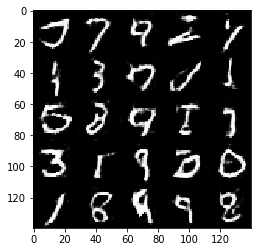

Epoch 1/2... Discriminator Loss: 1.2931... Generator Loss: 0.5484
Epoch 1/2... Discriminator Loss: 1.3802... Generator Loss: 0.5143
Epoch 1/2... Discriminator Loss: 1.3370... Generator Loss: 1.0158
Epoch 1/2... Discriminator Loss: 1.1290... Generator Loss: 0.7313
Epoch 1/2... Discriminator Loss: 1.2691... Generator Loss: 0.5907
Epoch 1/2... Discriminator Loss: 1.2479... Generator Loss: 0.4411
Epoch 1/2... Discriminator Loss: 1.3423... Generator Loss: 0.4557
Epoch 1/2... Discriminator Loss: 1.1963... Generator Loss: 0.6428
Epoch 1/2... Discriminator Loss: 1.1773... Generator Loss: 0.7677
Epoch 1/2... Discriminator Loss: 1.2503... Generator Loss: 0.6829


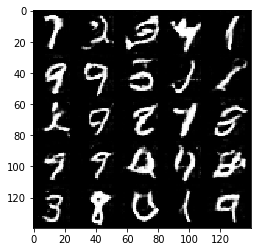

Epoch 1/2... Discriminator Loss: 1.0523... Generator Loss: 0.8541
Epoch 1/2... Discriminator Loss: 1.0420... Generator Loss: 0.8222
Epoch 1/2... Discriminator Loss: 1.2422... Generator Loss: 0.7569
Epoch 1/2... Discriminator Loss: 1.2546... Generator Loss: 0.5056
Epoch 1/2... Discriminator Loss: 1.1367... Generator Loss: 0.6855
Epoch 1/2... Discriminator Loss: 1.1292... Generator Loss: 0.8753
Epoch 1/2... Discriminator Loss: 0.9771... Generator Loss: 0.9934
Epoch 1/2... Discriminator Loss: 1.1460... Generator Loss: 0.7558
Epoch 1/2... Discriminator Loss: 1.1422... Generator Loss: 0.7714
Epoch 1/2... Discriminator Loss: 1.0562... Generator Loss: 0.8285


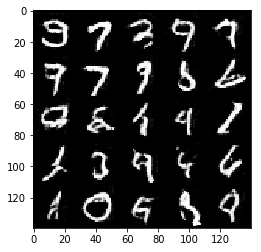

Epoch 1/2... Discriminator Loss: 1.2176... Generator Loss: 0.5834
Epoch 1/2... Discriminator Loss: 0.9922... Generator Loss: 0.8825
Epoch 1/2... Discriminator Loss: 1.2585... Generator Loss: 0.6477
Epoch 1/2... Discriminator Loss: 1.1751... Generator Loss: 0.5914
Epoch 1/2... Discriminator Loss: 1.1793... Generator Loss: 0.6876
Epoch 1/2... Discriminator Loss: 1.1653... Generator Loss: 0.6725
Epoch 1/2... Discriminator Loss: 1.1949... Generator Loss: 1.0473
Epoch 1/2... Discriminator Loss: 1.3142... Generator Loss: 0.5615
Epoch 1/2... Discriminator Loss: 1.1516... Generator Loss: 0.7639
Epoch 1/2... Discriminator Loss: 1.1190... Generator Loss: 0.8250


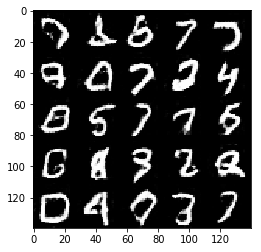

Epoch 1/2... Discriminator Loss: 1.1000... Generator Loss: 0.6139
Epoch 1/2... Discriminator Loss: 1.3905... Generator Loss: 0.4055
Epoch 1/2... Discriminator Loss: 1.2744... Generator Loss: 0.8251
Epoch 1/2... Discriminator Loss: 1.0910... Generator Loss: 0.7525
Epoch 1/2... Discriminator Loss: 1.3932... Generator Loss: 0.8785
Epoch 1/2... Discriminator Loss: 1.1234... Generator Loss: 0.7183
Epoch 1/2... Discriminator Loss: 1.2362... Generator Loss: 0.6105
Epoch 1/2... Discriminator Loss: 1.1737... Generator Loss: 0.7749
Epoch 1/2... Discriminator Loss: 1.0671... Generator Loss: 1.1273
Epoch 1/2... Discriminator Loss: 1.2753... Generator Loss: 0.6442


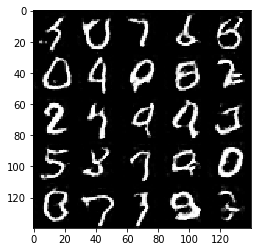

Epoch 1/2... Discriminator Loss: 1.0543... Generator Loss: 0.9974
Epoch 1/2... Discriminator Loss: 1.2278... Generator Loss: 0.7005
Epoch 1/2... Discriminator Loss: 0.9979... Generator Loss: 0.9699
Epoch 1/2... Discriminator Loss: 1.2445... Generator Loss: 0.8995
Epoch 1/2... Discriminator Loss: 1.1147... Generator Loss: 0.8094
Epoch 1/2... Discriminator Loss: 1.0748... Generator Loss: 0.6973
Epoch 1/2... Discriminator Loss: 1.2831... Generator Loss: 0.4771
Epoch 1/2... Discriminator Loss: 1.1819... Generator Loss: 0.6548
Epoch 1/2... Discriminator Loss: 1.2098... Generator Loss: 0.7050
Epoch 1/2... Discriminator Loss: 1.1940... Generator Loss: 0.6909


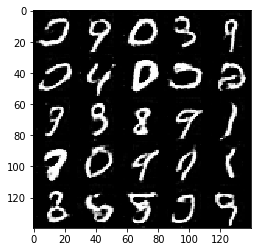

Epoch 1/2... Discriminator Loss: 1.0429... Generator Loss: 0.6402
Epoch 1/2... Discriminator Loss: 1.3146... Generator Loss: 0.6385
Epoch 1/2... Discriminator Loss: 1.1718... Generator Loss: 0.6647
Epoch 1/2... Discriminator Loss: 1.1562... Generator Loss: 1.1029
Epoch 1/2... Discriminator Loss: 1.2929... Generator Loss: 0.8322
Epoch 1/2... Discriminator Loss: 1.2237... Generator Loss: 0.6712
Epoch 1/2... Discriminator Loss: 1.2206... Generator Loss: 0.6695
Epoch 1/2... Discriminator Loss: 1.0925... Generator Loss: 1.0712
Epoch 1/2... Discriminator Loss: 1.1574... Generator Loss: 0.8373
Epoch 1/2... Discriminator Loss: 1.5112... Generator Loss: 0.3701


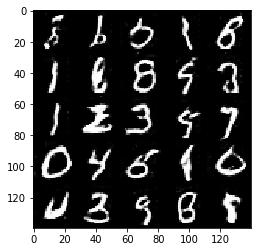

Epoch 1/2... Discriminator Loss: 1.1487... Generator Loss: 0.8825
Epoch 1/2... Discriminator Loss: 1.2825... Generator Loss: 0.6781
Epoch 1/2... Discriminator Loss: 1.1179... Generator Loss: 0.6355
Epoch 1/2... Discriminator Loss: 1.1720... Generator Loss: 0.7381
Epoch 1/2... Discriminator Loss: 1.2130... Generator Loss: 0.6689
Epoch 1/2... Discriminator Loss: 1.2994... Generator Loss: 0.9266
Epoch 1/2... Discriminator Loss: 1.1564... Generator Loss: 0.6634
Epoch 1/2... Discriminator Loss: 1.5068... Generator Loss: 0.3288
Epoch 1/2... Discriminator Loss: 1.1896... Generator Loss: 0.7752
Epoch 1/2... Discriminator Loss: 1.2275... Generator Loss: 0.6207


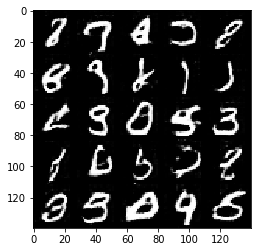

Epoch 1/2... Discriminator Loss: 1.0959... Generator Loss: 0.9320
Epoch 1/2... Discriminator Loss: 1.1863... Generator Loss: 0.6929
Epoch 1/2... Discriminator Loss: 1.1343... Generator Loss: 0.8852
Epoch 1/2... Discriminator Loss: 1.1919... Generator Loss: 0.7789
Epoch 1/2... Discriminator Loss: 1.1067... Generator Loss: 0.8349
Epoch 1/2... Discriminator Loss: 1.3008... Generator Loss: 0.4122
Epoch 1/2... Discriminator Loss: 1.1378... Generator Loss: 0.7141
Epoch 1/2... Discriminator Loss: 1.2376... Generator Loss: 0.7131
Epoch 1/2... Discriminator Loss: 1.3256... Generator Loss: 0.5405
Epoch 1/2... Discriminator Loss: 1.1417... Generator Loss: 0.7176


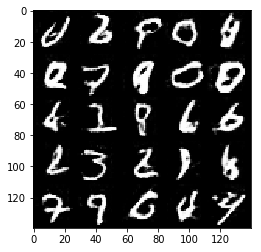

Epoch 1/2... Discriminator Loss: 1.0470... Generator Loss: 0.6802
Epoch 1/2... Discriminator Loss: 1.0943... Generator Loss: 0.7014
Epoch 1/2... Discriminator Loss: 1.2821... Generator Loss: 0.8678
Epoch 1/2... Discriminator Loss: 1.0878... Generator Loss: 0.7267
Epoch 1/2... Discriminator Loss: 1.2420... Generator Loss: 0.8979
Epoch 1/2... Discriminator Loss: 1.1926... Generator Loss: 0.9462
Epoch 1/2... Discriminator Loss: 1.1202... Generator Loss: 0.8218
Epoch 1/2... Discriminator Loss: 1.2013... Generator Loss: 0.6509
Epoch 1/2... Discriminator Loss: 1.1126... Generator Loss: 0.8366
Epoch 1/2... Discriminator Loss: 1.1978... Generator Loss: 0.6517


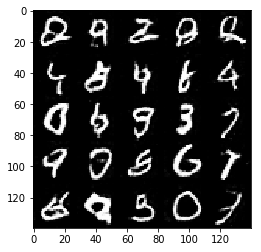

Epoch 1/2... Discriminator Loss: 1.2923... Generator Loss: 1.0541
Epoch 1/2... Discriminator Loss: 1.0803... Generator Loss: 0.8984
Epoch 1/2... Discriminator Loss: 1.1582... Generator Loss: 0.6465
Epoch 1/2... Discriminator Loss: 1.0120... Generator Loss: 1.0068
Epoch 1/2... Discriminator Loss: 1.6994... Generator Loss: 1.2084
Epoch 1/2... Discriminator Loss: 1.3934... Generator Loss: 0.6770
Epoch 1/2... Discriminator Loss: 1.1796... Generator Loss: 0.6356
Epoch 1/2... Discriminator Loss: 1.1876... Generator Loss: 0.7731
Epoch 1/2... Discriminator Loss: 1.2108... Generator Loss: 0.6416
Epoch 1/2... Discriminator Loss: 1.2601... Generator Loss: 0.6059


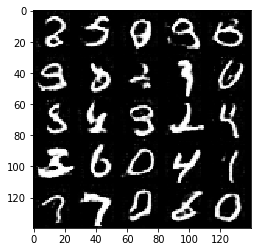

Epoch 1/2... Discriminator Loss: 1.1358... Generator Loss: 0.7402
Epoch 1/2... Discriminator Loss: 1.3580... Generator Loss: 0.4446
Epoch 1/2... Discriminator Loss: 1.4385... Generator Loss: 1.3340
Epoch 1/2... Discriminator Loss: 1.2133... Generator Loss: 0.7956
Epoch 1/2... Discriminator Loss: 1.1135... Generator Loss: 0.7942
Epoch 1/2... Discriminator Loss: 1.4325... Generator Loss: 0.7197
Epoch 1/2... Discriminator Loss: 2.1850... Generator Loss: 1.9869
Epoch 1/2... Discriminator Loss: 1.0224... Generator Loss: 0.9872
Epoch 1/2... Discriminator Loss: 1.2217... Generator Loss: 0.8511
Epoch 1/2... Discriminator Loss: 1.1471... Generator Loss: 0.7031


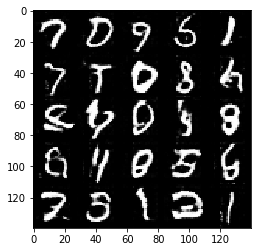

Epoch 1/2... Discriminator Loss: 1.1389... Generator Loss: 0.8702
Epoch 1/2... Discriminator Loss: 1.1108... Generator Loss: 0.8694
Epoch 1/2... Discriminator Loss: 1.1578... Generator Loss: 0.7259
Epoch 1/2... Discriminator Loss: 1.0523... Generator Loss: 0.8987
Epoch 1/2... Discriminator Loss: 1.2137... Generator Loss: 0.7183
Epoch 1/2... Discriminator Loss: 1.2247... Generator Loss: 0.9747
Epoch 1/2... Discriminator Loss: 1.2615... Generator Loss: 0.5212
Epoch 1/2... Discriminator Loss: 1.2128... Generator Loss: 0.7822
Epoch 1/2... Discriminator Loss: 1.3119... Generator Loss: 0.5450
Epoch 1/2... Discriminator Loss: 1.1693... Generator Loss: 0.7509


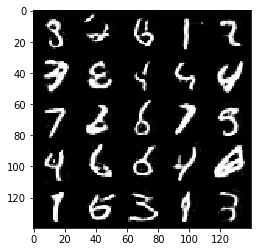

Epoch 1/2... Discriminator Loss: 1.2287... Generator Loss: 0.6039
Epoch 1/2... Discriminator Loss: 1.2076... Generator Loss: 0.7716
Epoch 1/2... Discriminator Loss: 1.2315... Generator Loss: 0.6637
Epoch 1/2... Discriminator Loss: 1.2997... Generator Loss: 0.5992
Epoch 1/2... Discriminator Loss: 1.0223... Generator Loss: 0.7906
Epoch 1/2... Discriminator Loss: 1.1490... Generator Loss: 1.1613
Epoch 1/2... Discriminator Loss: 1.5380... Generator Loss: 0.3981
Epoch 1/2... Discriminator Loss: 1.2370... Generator Loss: 0.6628
Epoch 1/2... Discriminator Loss: 1.3572... Generator Loss: 0.7577
Epoch 1/2... Discriminator Loss: 1.1333... Generator Loss: 0.8493


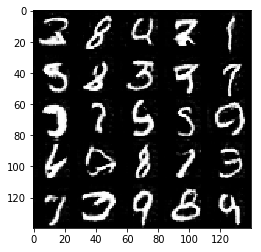

Epoch 1/2... Discriminator Loss: 1.2891... Generator Loss: 0.9594
Epoch 1/2... Discriminator Loss: 1.1576... Generator Loss: 0.6934
Epoch 1/2... Discriminator Loss: 1.1828... Generator Loss: 0.7952
Epoch 1/2... Discriminator Loss: 1.2403... Generator Loss: 0.8587
Epoch 1/2... Discriminator Loss: 1.3406... Generator Loss: 0.6115
Epoch 1/2... Discriminator Loss: 1.1053... Generator Loss: 0.7471
Epoch 1/2... Discriminator Loss: 1.3629... Generator Loss: 0.7429
Epoch 1/2... Discriminator Loss: 1.3772... Generator Loss: 0.4836
Epoch 1/2... Discriminator Loss: 1.4371... Generator Loss: 0.4934
Epoch 1/2... Discriminator Loss: 1.4643... Generator Loss: 0.4099


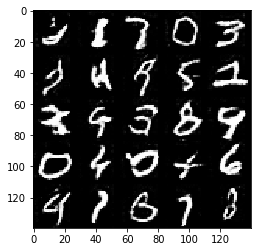

Epoch 1/2... Discriminator Loss: 1.2157... Generator Loss: 0.5546
Epoch 1/2... Discriminator Loss: 1.1338... Generator Loss: 1.0065
Epoch 1/2... Discriminator Loss: 1.2371... Generator Loss: 0.6092
Epoch 1/2... Discriminator Loss: 1.1232... Generator Loss: 0.7556
Epoch 1/2... Discriminator Loss: 1.2165... Generator Loss: 0.6529
Epoch 1/2... Discriminator Loss: 1.0732... Generator Loss: 0.9457
Epoch 1/2... Discriminator Loss: 1.2724... Generator Loss: 0.6411
Epoch 1/2... Discriminator Loss: 1.2215... Generator Loss: 0.6614
Epoch 1/2... Discriminator Loss: 1.6201... Generator Loss: 0.3306
Epoch 1/2... Discriminator Loss: 1.2475... Generator Loss: 0.5825


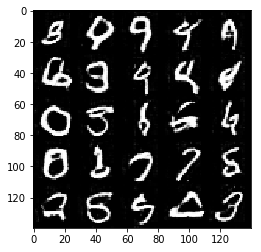

Epoch 1/2... Discriminator Loss: 1.3185... Generator Loss: 0.5100
Epoch 1/2... Discriminator Loss: 1.2460... Generator Loss: 0.7585
Epoch 1/2... Discriminator Loss: 1.2577... Generator Loss: 0.7413
Epoch 1/2... Discriminator Loss: 1.3101... Generator Loss: 0.5555
Epoch 1/2... Discriminator Loss: 1.2172... Generator Loss: 0.6505
Epoch 1/2... Discriminator Loss: 1.0644... Generator Loss: 1.3035


In [12]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Discriminator Loss: 4.2503... Generator Loss: 0.0219
Epoch 0/1... Discriminator Loss: 1.9613... Generator Loss: 0.2950
Epoch 0/1... Discriminator Loss: 1.4497... Generator Loss: 0.5230
Epoch 0/1... Discriminator Loss: 1.4741... Generator Loss: 0.4886
Epoch 0/1... Discriminator Loss: 1.5581... Generator Loss: 0.6160
Epoch 0/1... Discriminator Loss: 0.9470... Generator Loss: 1.2245
Epoch 0/1... Discriminator Loss: 1.5765... Generator Loss: 0.5844
Epoch 0/1... Discriminator Loss: 0.7958... Generator Loss: 1.0904
Epoch 0/1... Discriminator Loss: 1.3836... Generator Loss: 0.6546


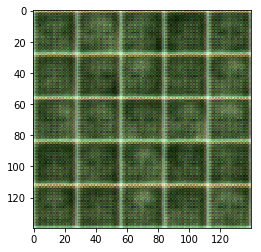

Epoch 0/1... Discriminator Loss: 1.3749... Generator Loss: 0.5625
Epoch 0/1... Discriminator Loss: 0.9128... Generator Loss: 1.1821
Epoch 0/1... Discriminator Loss: 0.8427... Generator Loss: 1.1385
Epoch 0/1... Discriminator Loss: 1.3601... Generator Loss: 0.6022
Epoch 0/1... Discriminator Loss: 1.0045... Generator Loss: 1.5609
Epoch 0/1... Discriminator Loss: 1.0305... Generator Loss: 0.8098
Epoch 0/1... Discriminator Loss: 1.1774... Generator Loss: 0.6184
Epoch 0/1... Discriminator Loss: 1.6680... Generator Loss: 0.2861
Epoch 0/1... Discriminator Loss: 1.2239... Generator Loss: 0.5327
Epoch 0/1... Discriminator Loss: 0.7424... Generator Loss: 1.2857


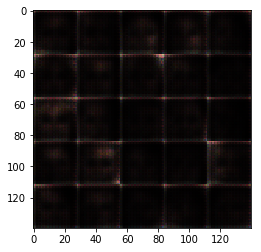

Epoch 0/1... Discriminator Loss: 0.7944... Generator Loss: 1.1464
Epoch 0/1... Discriminator Loss: 0.8072... Generator Loss: 1.7648
Epoch 0/1... Discriminator Loss: 0.3200... Generator Loss: 2.6626
Epoch 0/1... Discriminator Loss: 0.4033... Generator Loss: 1.9677
Epoch 0/1... Discriminator Loss: 0.4543... Generator Loss: 4.1218
Epoch 0/1... Discriminator Loss: 0.7110... Generator Loss: 1.0512
Epoch 0/1... Discriminator Loss: 0.2555... Generator Loss: 2.1531
Epoch 0/1... Discriminator Loss: 0.2928... Generator Loss: 4.2075
Epoch 0/1... Discriminator Loss: 0.7779... Generator Loss: 6.5596
Epoch 0/1... Discriminator Loss: 0.9858... Generator Loss: 4.5003


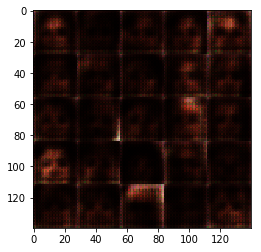

Epoch 0/1... Discriminator Loss: 0.4634... Generator Loss: 3.7049
Epoch 0/1... Discriminator Loss: 1.0795... Generator Loss: 0.5515
Epoch 0/1... Discriminator Loss: 0.7444... Generator Loss: 1.7258
Epoch 0/1... Discriminator Loss: 2.1330... Generator Loss: 0.1763
Epoch 0/1... Discriminator Loss: 0.2698... Generator Loss: 2.1536
Epoch 0/1... Discriminator Loss: 1.0254... Generator Loss: 0.7464
Epoch 0/1... Discriminator Loss: 0.6610... Generator Loss: 1.6385
Epoch 0/1... Discriminator Loss: 0.6690... Generator Loss: 1.3518
Epoch 0/1... Discriminator Loss: 0.8928... Generator Loss: 0.8568
Epoch 0/1... Discriminator Loss: 1.1172... Generator Loss: 0.5670


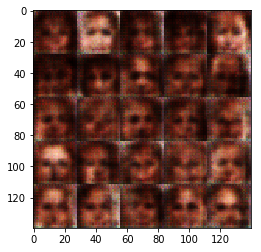

Epoch 0/1... Discriminator Loss: 1.2868... Generator Loss: 1.4352
Epoch 0/1... Discriminator Loss: 1.2635... Generator Loss: 1.0334
Epoch 0/1... Discriminator Loss: 1.5814... Generator Loss: 0.5241
Epoch 0/1... Discriminator Loss: 1.5085... Generator Loss: 0.8585
Epoch 0/1... Discriminator Loss: 1.0032... Generator Loss: 1.1862
Epoch 0/1... Discriminator Loss: 1.1947... Generator Loss: 3.3953
Epoch 0/1... Discriminator Loss: 0.6204... Generator Loss: 2.2071
Epoch 0/1... Discriminator Loss: 0.4660... Generator Loss: 4.9948
Epoch 0/1... Discriminator Loss: 1.1332... Generator Loss: 1.0218
Epoch 0/1... Discriminator Loss: 1.5956... Generator Loss: 0.5129


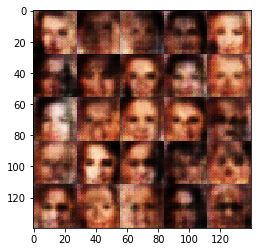

Epoch 0/1... Discriminator Loss: 0.7523... Generator Loss: 3.5661
Epoch 0/1... Discriminator Loss: 0.7562... Generator Loss: 0.8805
Epoch 0/1... Discriminator Loss: 1.9468... Generator Loss: 0.2006
Epoch 0/1... Discriminator Loss: 1.8431... Generator Loss: 0.3132
Epoch 0/1... Discriminator Loss: 1.3850... Generator Loss: 0.5738
Epoch 0/1... Discriminator Loss: 1.4398... Generator Loss: 0.5290
Epoch 0/1... Discriminator Loss: 0.9315... Generator Loss: 1.3565
Epoch 0/1... Discriminator Loss: 0.8752... Generator Loss: 2.7718
Epoch 0/1... Discriminator Loss: 1.1304... Generator Loss: 1.3434
Epoch 0/1... Discriminator Loss: 1.6333... Generator Loss: 0.7450


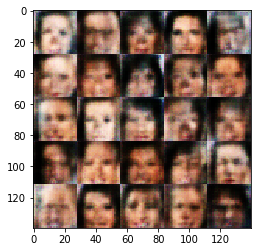

Epoch 0/1... Discriminator Loss: 0.7550... Generator Loss: 2.0078
Epoch 0/1... Discriminator Loss: 0.6705... Generator Loss: 1.8655
Epoch 0/1... Discriminator Loss: 0.2720... Generator Loss: 4.4044
Epoch 0/1... Discriminator Loss: 1.6772... Generator Loss: 0.3231
Epoch 0/1... Discriminator Loss: 0.7100... Generator Loss: 1.0777
Epoch 0/1... Discriminator Loss: 1.4975... Generator Loss: 0.3409
Epoch 0/1... Discriminator Loss: 0.6368... Generator Loss: 1.1235
Epoch 0/1... Discriminator Loss: 1.5453... Generator Loss: 0.4018
Epoch 0/1... Discriminator Loss: 0.8977... Generator Loss: 1.4638
Epoch 0/1... Discriminator Loss: 0.7606... Generator Loss: 1.3402


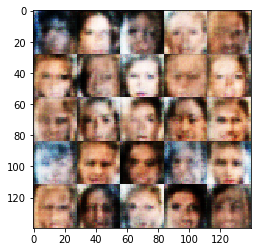

Epoch 0/1... Discriminator Loss: 1.3446... Generator Loss: 0.8422
Epoch 0/1... Discriminator Loss: 1.1314... Generator Loss: 1.0633
Epoch 0/1... Discriminator Loss: 0.9417... Generator Loss: 1.5292
Epoch 0/1... Discriminator Loss: 0.8938... Generator Loss: 1.3086
Epoch 0/1... Discriminator Loss: 1.1196... Generator Loss: 2.2953
Epoch 0/1... Discriminator Loss: 1.6705... Generator Loss: 0.2949
Epoch 0/1... Discriminator Loss: 1.4173... Generator Loss: 0.4983
Epoch 0/1... Discriminator Loss: 1.3711... Generator Loss: 0.7747
Epoch 0/1... Discriminator Loss: 0.7988... Generator Loss: 1.7567
Epoch 0/1... Discriminator Loss: 1.4636... Generator Loss: 0.6462


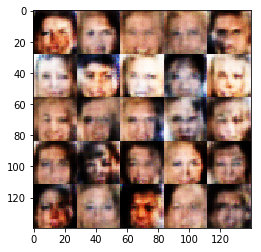

Epoch 0/1... Discriminator Loss: 1.3512... Generator Loss: 0.8729
Epoch 0/1... Discriminator Loss: 1.6399... Generator Loss: 0.5463
Epoch 0/1... Discriminator Loss: 1.3075... Generator Loss: 0.7357
Epoch 0/1... Discriminator Loss: 1.5114... Generator Loss: 0.7113
Epoch 0/1... Discriminator Loss: 0.7341... Generator Loss: 2.1824
Epoch 0/1... Discriminator Loss: 1.3903... Generator Loss: 0.7798
Epoch 0/1... Discriminator Loss: 1.2036... Generator Loss: 0.8427
Epoch 0/1... Discriminator Loss: 1.4520... Generator Loss: 0.7184
Epoch 0/1... Discriminator Loss: 1.7927... Generator Loss: 0.2573
Epoch 0/1... Discriminator Loss: 0.9802... Generator Loss: 1.3199


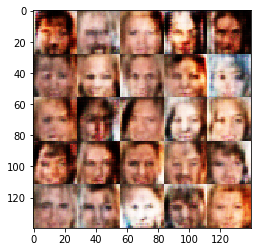

Epoch 0/1... Discriminator Loss: 1.4053... Generator Loss: 0.5874
Epoch 0/1... Discriminator Loss: 1.4114... Generator Loss: 0.6081
Epoch 0/1... Discriminator Loss: 1.0234... Generator Loss: 1.0989
Epoch 0/1... Discriminator Loss: 1.4903... Generator Loss: 0.4860
Epoch 0/1... Discriminator Loss: 1.5765... Generator Loss: 0.5410
Epoch 0/1... Discriminator Loss: 1.5870... Generator Loss: 0.4103
Epoch 0/1... Discriminator Loss: 1.4741... Generator Loss: 0.4907
Epoch 0/1... Discriminator Loss: 1.3659... Generator Loss: 0.3971
Epoch 0/1... Discriminator Loss: 1.4821... Generator Loss: 0.6284
Epoch 0/1... Discriminator Loss: 1.6999... Generator Loss: 0.3669


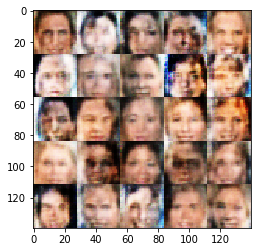

Epoch 0/1... Discriminator Loss: 1.4163... Generator Loss: 0.5563
Epoch 0/1... Discriminator Loss: 1.2045... Generator Loss: 0.6442
Epoch 0/1... Discriminator Loss: 1.5787... Generator Loss: 0.3636
Epoch 0/1... Discriminator Loss: 1.4317... Generator Loss: 0.8246
Epoch 0/1... Discriminator Loss: 1.4252... Generator Loss: 0.5787
Epoch 0/1... Discriminator Loss: 1.2589... Generator Loss: 0.7646
Epoch 0/1... Discriminator Loss: 1.5022... Generator Loss: 0.5316
Epoch 0/1... Discriminator Loss: 1.3881... Generator Loss: 0.9681
Epoch 0/1... Discriminator Loss: 0.9761... Generator Loss: 0.9099
Epoch 0/1... Discriminator Loss: 1.5583... Generator Loss: 0.5021


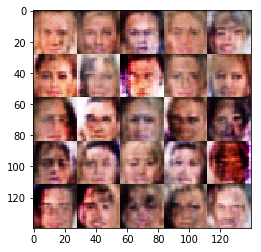

Epoch 0/1... Discriminator Loss: 0.8319... Generator Loss: 1.2748
Epoch 0/1... Discriminator Loss: 1.2098... Generator Loss: 1.0573
Epoch 0/1... Discriminator Loss: 1.2177... Generator Loss: 0.6451
Epoch 0/1... Discriminator Loss: 1.5100... Generator Loss: 0.7115
Epoch 0/1... Discriminator Loss: 1.3258... Generator Loss: 0.7245
Epoch 0/1... Discriminator Loss: 1.3635... Generator Loss: 0.5728
Epoch 0/1... Discriminator Loss: 1.4913... Generator Loss: 0.4786
Epoch 0/1... Discriminator Loss: 1.3452... Generator Loss: 0.5204
Epoch 0/1... Discriminator Loss: 1.4392... Generator Loss: 0.6810
Epoch 0/1... Discriminator Loss: 1.4176... Generator Loss: 0.5802


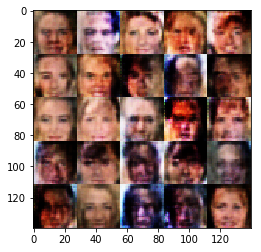

Epoch 0/1... Discriminator Loss: 1.2366... Generator Loss: 0.9696
Epoch 0/1... Discriminator Loss: 1.5072... Generator Loss: 0.5329
Epoch 0/1... Discriminator Loss: 0.9771... Generator Loss: 1.3525
Epoch 0/1... Discriminator Loss: 1.6258... Generator Loss: 0.5051
Epoch 0/1... Discriminator Loss: 1.4997... Generator Loss: 1.4153
Epoch 0/1... Discriminator Loss: 1.5613... Generator Loss: 0.5108
Epoch 0/1... Discriminator Loss: 1.4224... Generator Loss: 0.5167
Epoch 0/1... Discriminator Loss: 1.6574... Generator Loss: 0.5961
Epoch 0/1... Discriminator Loss: 0.9884... Generator Loss: 1.3619
Epoch 0/1... Discriminator Loss: 1.3354... Generator Loss: 1.1096


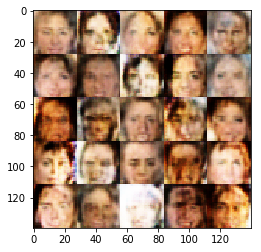

Epoch 0/1... Discriminator Loss: 1.3434... Generator Loss: 0.6347
Epoch 0/1... Discriminator Loss: 1.7637... Generator Loss: 0.2757
Epoch 0/1... Discriminator Loss: 1.3527... Generator Loss: 0.6492
Epoch 0/1... Discriminator Loss: 2.0851... Generator Loss: 0.1711
Epoch 0/1... Discriminator Loss: 1.4261... Generator Loss: 0.8209
Epoch 0/1... Discriminator Loss: 1.4284... Generator Loss: 1.1654
Epoch 0/1... Discriminator Loss: 0.4605... Generator Loss: 2.5398
Epoch 0/1... Discriminator Loss: 1.5229... Generator Loss: 0.6337
Epoch 0/1... Discriminator Loss: 1.1222... Generator Loss: 0.8360
Epoch 0/1... Discriminator Loss: 1.3303... Generator Loss: 0.7270


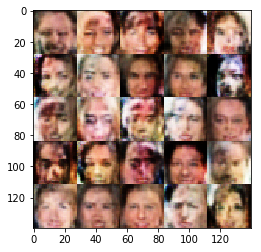

Epoch 0/1... Discriminator Loss: 1.4661... Generator Loss: 0.8623
Epoch 0/1... Discriminator Loss: 1.5286... Generator Loss: 0.8583
Epoch 0/1... Discriminator Loss: 1.1350... Generator Loss: 0.6233
Epoch 0/1... Discriminator Loss: 1.6931... Generator Loss: 0.2951
Epoch 0/1... Discriminator Loss: 1.5181... Generator Loss: 0.3993
Epoch 0/1... Discriminator Loss: 1.4584... Generator Loss: 0.5978
Epoch 0/1... Discriminator Loss: 1.2853... Generator Loss: 0.6936
Epoch 0/1... Discriminator Loss: 1.0639... Generator Loss: 0.7681
Epoch 0/1... Discriminator Loss: 1.3326... Generator Loss: 0.6521
Epoch 0/1... Discriminator Loss: 0.4596... Generator Loss: 2.6293


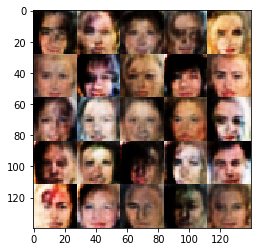

Epoch 0/1... Discriminator Loss: 1.3608... Generator Loss: 0.8435
Epoch 0/1... Discriminator Loss: 1.6803... Generator Loss: 0.5266
Epoch 0/1... Discriminator Loss: 1.2562... Generator Loss: 0.6900
Epoch 0/1... Discriminator Loss: 1.6187... Generator Loss: 0.4522
Epoch 0/1... Discriminator Loss: 1.3629... Generator Loss: 0.7743
Epoch 0/1... Discriminator Loss: 0.7934... Generator Loss: 1.4045
Epoch 0/1... Discriminator Loss: 1.4805... Generator Loss: 0.4622
Epoch 0/1... Discriminator Loss: 1.4683... Generator Loss: 0.6290
Epoch 0/1... Discriminator Loss: 1.5163... Generator Loss: 0.6041
Epoch 0/1... Discriminator Loss: 1.3616... Generator Loss: 0.8292


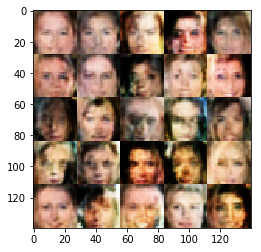

Epoch 0/1... Discriminator Loss: 1.5059... Generator Loss: 0.6260
Epoch 0/1... Discriminator Loss: 1.3281... Generator Loss: 0.6325
Epoch 0/1... Discriminator Loss: 1.5971... Generator Loss: 0.4640
Epoch 0/1... Discriminator Loss: 1.2272... Generator Loss: 1.0047
Epoch 0/1... Discriminator Loss: 1.4347... Generator Loss: 0.6331
Epoch 0/1... Discriminator Loss: 0.7732... Generator Loss: 1.7595
Epoch 0/1... Discriminator Loss: 1.4312... Generator Loss: 0.6035
Epoch 0/1... Discriminator Loss: 1.0898... Generator Loss: 0.8366
Epoch 0/1... Discriminator Loss: 1.5320... Generator Loss: 1.1562
Epoch 0/1... Discriminator Loss: 1.5330... Generator Loss: 0.5475


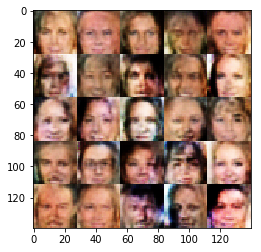

Epoch 0/1... Discriminator Loss: 1.1933... Generator Loss: 0.6435
Epoch 0/1... Discriminator Loss: 1.4055... Generator Loss: 0.6320
Epoch 0/1... Discriminator Loss: 1.5175... Generator Loss: 0.4139
Epoch 0/1... Discriminator Loss: 1.2992... Generator Loss: 0.6008
Epoch 0/1... Discriminator Loss: 1.3923... Generator Loss: 0.8585
Epoch 0/1... Discriminator Loss: 1.4304... Generator Loss: 0.5843
Epoch 0/1... Discriminator Loss: 1.0101... Generator Loss: 1.3391
Epoch 0/1... Discriminator Loss: 1.2611... Generator Loss: 1.0658
Epoch 0/1... Discriminator Loss: 1.4633... Generator Loss: 1.1069
Epoch 0/1... Discriminator Loss: 1.5229... Generator Loss: 0.9933


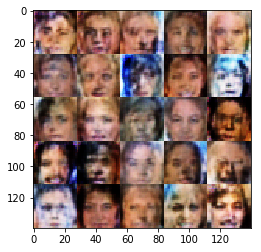

Epoch 0/1... Discriminator Loss: 1.3971... Generator Loss: 0.9351
Epoch 0/1... Discriminator Loss: 1.3561... Generator Loss: 0.7115
Epoch 0/1... Discriminator Loss: 1.2544... Generator Loss: 0.8958
Epoch 0/1... Discriminator Loss: 1.4580... Generator Loss: 0.5442
Epoch 0/1... Discriminator Loss: 1.3806... Generator Loss: 0.5205
Epoch 0/1... Discriminator Loss: 0.8173... Generator Loss: 1.4085
Epoch 0/1... Discriminator Loss: 1.2967... Generator Loss: 0.6650
Epoch 0/1... Discriminator Loss: 1.0604... Generator Loss: 0.7669
Epoch 0/1... Discriminator Loss: 1.1526... Generator Loss: 0.9741
Epoch 0/1... Discriminator Loss: 1.0896... Generator Loss: 0.8962


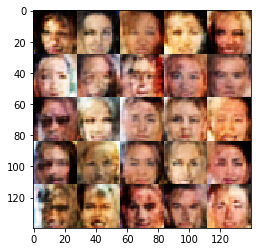

Epoch 0/1... Discriminator Loss: 1.3965... Generator Loss: 0.6345
Epoch 0/1... Discriminator Loss: 1.2717... Generator Loss: 0.6340
Epoch 0/1... Discriminator Loss: 0.8276... Generator Loss: 1.2062
Epoch 0/1... Discriminator Loss: 0.8510... Generator Loss: 1.8151
Epoch 0/1... Discriminator Loss: 0.7788... Generator Loss: 1.1762
Epoch 0/1... Discriminator Loss: 1.0368... Generator Loss: 1.4272
Epoch 0/1... Discriminator Loss: 1.0280... Generator Loss: 1.1872
Epoch 0/1... Discriminator Loss: 1.3608... Generator Loss: 0.4554
Epoch 0/1... Discriminator Loss: 1.5988... Generator Loss: 1.1899
Epoch 0/1... Discriminator Loss: 1.1909... Generator Loss: 0.5929


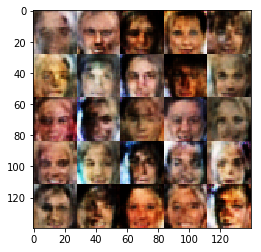

Epoch 0/1... Discriminator Loss: 1.2797... Generator Loss: 0.7235
Epoch 0/1... Discriminator Loss: 1.5303... Generator Loss: 0.5842
Epoch 0/1... Discriminator Loss: 1.3515... Generator Loss: 0.7638
Epoch 0/1... Discriminator Loss: 1.0895... Generator Loss: 1.1840
Epoch 0/1... Discriminator Loss: 1.2505... Generator Loss: 0.9415
Epoch 0/1... Discriminator Loss: 1.3481... Generator Loss: 0.9758
Epoch 0/1... Discriminator Loss: 1.2677... Generator Loss: 0.8683
Epoch 0/1... Discriminator Loss: 1.3475... Generator Loss: 0.5977
Epoch 0/1... Discriminator Loss: 1.0899... Generator Loss: 1.6476
Epoch 0/1... Discriminator Loss: 0.6546... Generator Loss: 2.1429


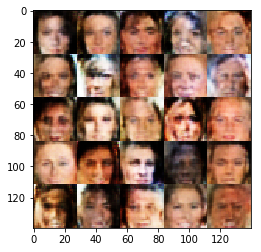

Epoch 0/1... Discriminator Loss: 1.1926... Generator Loss: 0.7900
Epoch 0/1... Discriminator Loss: 1.4061... Generator Loss: 0.7093
Epoch 0/1... Discriminator Loss: 1.4531... Generator Loss: 0.3742
Epoch 0/1... Discriminator Loss: 1.5065... Generator Loss: 0.6805
Epoch 0/1... Discriminator Loss: 1.2256... Generator Loss: 0.8444
Epoch 0/1... Discriminator Loss: 1.4188... Generator Loss: 0.6358
Epoch 0/1... Discriminator Loss: 1.3427... Generator Loss: 0.8644
Epoch 0/1... Discriminator Loss: 0.8956... Generator Loss: 1.2829
Epoch 0/1... Discriminator Loss: 1.3622... Generator Loss: 0.5698
Epoch 0/1... Discriminator Loss: 0.9663... Generator Loss: 0.9195


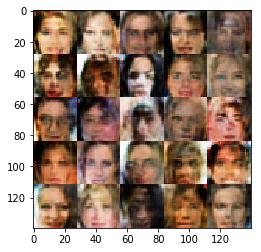

Epoch 0/1... Discriminator Loss: 0.7158... Generator Loss: 2.0187
Epoch 0/1... Discriminator Loss: 1.6810... Generator Loss: 0.5533
Epoch 0/1... Discriminator Loss: 1.5160... Generator Loss: 0.4471
Epoch 0/1... Discriminator Loss: 1.2472... Generator Loss: 1.2894
Epoch 0/1... Discriminator Loss: 1.1697... Generator Loss: 0.6959
Epoch 0/1... Discriminator Loss: 1.1808... Generator Loss: 1.0641
Epoch 0/1... Discriminator Loss: 1.6802... Generator Loss: 0.3859
Epoch 0/1... Discriminator Loss: 0.9870... Generator Loss: 1.2111
Epoch 0/1... Discriminator Loss: 0.9450... Generator Loss: 1.1208
Epoch 0/1... Discriminator Loss: 1.1137... Generator Loss: 1.1921


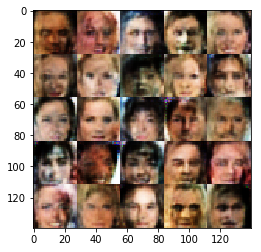

Epoch 0/1... Discriminator Loss: 1.0018... Generator Loss: 0.7902
Epoch 0/1... Discriminator Loss: 1.5639... Generator Loss: 0.4737
Epoch 0/1... Discriminator Loss: 1.1631... Generator Loss: 0.7429
Epoch 0/1... Discriminator Loss: 1.2746... Generator Loss: 0.8219
Epoch 0/1... Discriminator Loss: 1.3084... Generator Loss: 0.8426
Epoch 0/1... Discriminator Loss: 1.1871... Generator Loss: 1.2344
Epoch 0/1... Discriminator Loss: 1.2118... Generator Loss: 0.5617
Epoch 0/1... Discriminator Loss: 1.4259... Generator Loss: 0.7897
Epoch 0/1... Discriminator Loss: 1.6682... Generator Loss: 0.3064
Epoch 0/1... Discriminator Loss: 1.3764... Generator Loss: 0.6508


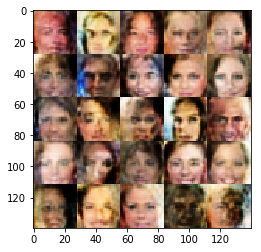

Epoch 0/1... Discriminator Loss: 0.9852... Generator Loss: 1.1405
Epoch 0/1... Discriminator Loss: 1.2510... Generator Loss: 0.7323
Epoch 0/1... Discriminator Loss: 0.9562... Generator Loss: 1.2551
Epoch 0/1... Discriminator Loss: 1.5316... Generator Loss: 0.7856
Epoch 0/1... Discriminator Loss: 1.1875... Generator Loss: 0.6886
Epoch 0/1... Discriminator Loss: 1.3525... Generator Loss: 0.5499
Epoch 0/1... Discriminator Loss: 1.3997... Generator Loss: 0.7564
Epoch 0/1... Discriminator Loss: 1.1202... Generator Loss: 1.0773
Epoch 0/1... Discriminator Loss: 0.9592... Generator Loss: 0.9559
Epoch 0/1... Discriminator Loss: 1.2757... Generator Loss: 2.6118


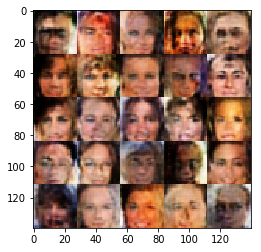

Epoch 0/1... Discriminator Loss: 0.6653... Generator Loss: 1.4916
Epoch 0/1... Discriminator Loss: 1.1926... Generator Loss: 0.8342
Epoch 0/1... Discriminator Loss: 1.3050... Generator Loss: 1.4221
Epoch 0/1... Discriminator Loss: 1.4083... Generator Loss: 0.6099
Epoch 0/1... Discriminator Loss: 1.4842... Generator Loss: 0.4231
Epoch 0/1... Discriminator Loss: 1.6161... Generator Loss: 0.3256
Epoch 0/1... Discriminator Loss: 1.2050... Generator Loss: 0.8592
Epoch 0/1... Discriminator Loss: 0.9457... Generator Loss: 1.2932
Epoch 0/1... Discriminator Loss: 1.1241... Generator Loss: 0.9034
Epoch 0/1... Discriminator Loss: 0.7922... Generator Loss: 1.4480


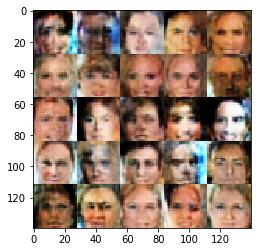

Epoch 0/1... Discriminator Loss: 1.1838... Generator Loss: 0.7858
Epoch 0/1... Discriminator Loss: 1.1025... Generator Loss: 0.8539
Epoch 0/1... Discriminator Loss: 1.1968... Generator Loss: 0.7037
Epoch 0/1... Discriminator Loss: 1.4451... Generator Loss: 0.7780
Epoch 0/1... Discriminator Loss: 0.9431... Generator Loss: 1.1906
Epoch 0/1... Discriminator Loss: 1.4704... Generator Loss: 0.5463
Epoch 0/1... Discriminator Loss: 1.2326... Generator Loss: 0.7917
Epoch 0/1... Discriminator Loss: 1.0050... Generator Loss: 1.1988
Epoch 0/1... Discriminator Loss: 1.5093... Generator Loss: 0.6563
Epoch 0/1... Discriminator Loss: 1.4591... Generator Loss: 1.0082


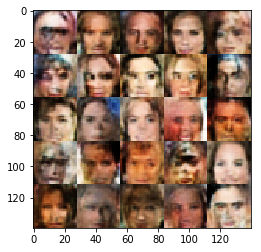

Epoch 0/1... Discriminator Loss: 1.1958... Generator Loss: 0.8718
Epoch 0/1... Discriminator Loss: 1.4197... Generator Loss: 0.4814
Epoch 0/1... Discriminator Loss: 1.4104... Generator Loss: 0.6211
Epoch 0/1... Discriminator Loss: 1.1605... Generator Loss: 0.8007
Epoch 0/1... Discriminator Loss: 1.4170... Generator Loss: 0.6543
Epoch 0/1... Discriminator Loss: 1.1537... Generator Loss: 0.8059
Epoch 0/1... Discriminator Loss: 0.9610... Generator Loss: 1.0582
Epoch 0/1... Discriminator Loss: 1.4205... Generator Loss: 0.5782
Epoch 0/1... Discriminator Loss: 1.2881... Generator Loss: 0.7552
Epoch 0/1... Discriminator Loss: 1.3307... Generator Loss: 0.5608


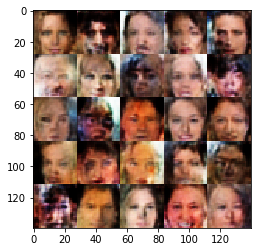

Epoch 0/1... Discriminator Loss: 1.0094... Generator Loss: 1.1092
Epoch 0/1... Discriminator Loss: 1.6386... Generator Loss: 0.3560
Epoch 0/1... Discriminator Loss: 1.3247... Generator Loss: 0.9198
Epoch 0/1... Discriminator Loss: 0.9556... Generator Loss: 1.1092
Epoch 0/1... Discriminator Loss: 1.1038... Generator Loss: 0.8663
Epoch 0/1... Discriminator Loss: 1.3498... Generator Loss: 0.7218
Epoch 0/1... Discriminator Loss: 1.4527... Generator Loss: 0.5369
Epoch 0/1... Discriminator Loss: 1.0189... Generator Loss: 1.0367
Epoch 0/1... Discriminator Loss: 1.5501... Generator Loss: 0.3819
Epoch 0/1... Discriminator Loss: 0.9960... Generator Loss: 1.2540


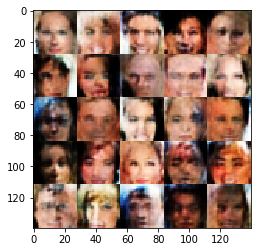

Epoch 0/1... Discriminator Loss: 1.3975... Generator Loss: 0.4875
Epoch 0/1... Discriminator Loss: 1.4488... Generator Loss: 0.7441
Epoch 0/1... Discriminator Loss: 1.3252... Generator Loss: 0.6503
Epoch 0/1... Discriminator Loss: 1.5627... Generator Loss: 0.4130
Epoch 0/1... Discriminator Loss: 0.9176... Generator Loss: 1.4241
Epoch 0/1... Discriminator Loss: 1.2219... Generator Loss: 0.7204
Epoch 0/1... Discriminator Loss: 1.3068... Generator Loss: 0.7805
Epoch 0/1... Discriminator Loss: 1.1515... Generator Loss: 0.9275
Epoch 0/1... Discriminator Loss: 1.1242... Generator Loss: 1.0788
Epoch 0/1... Discriminator Loss: 1.4936... Generator Loss: 0.5834


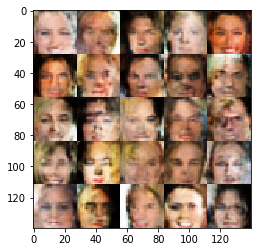

Epoch 0/1... Discriminator Loss: 1.4940... Generator Loss: 0.4097
Epoch 0/1... Discriminator Loss: 1.2955... Generator Loss: 0.7830
Epoch 0/1... Discriminator Loss: 1.0405... Generator Loss: 0.9342
Epoch 0/1... Discriminator Loss: 1.4343... Generator Loss: 0.6509
Epoch 0/1... Discriminator Loss: 1.2845... Generator Loss: 1.1788
Epoch 0/1... Discriminator Loss: 1.2531... Generator Loss: 1.3307
Epoch 0/1... Discriminator Loss: 1.0825... Generator Loss: 1.0820
Epoch 0/1... Discriminator Loss: 1.3600... Generator Loss: 0.6290
Epoch 0/1... Discriminator Loss: 1.3391... Generator Loss: 0.8946
Epoch 0/1... Discriminator Loss: 1.2383... Generator Loss: 0.7805


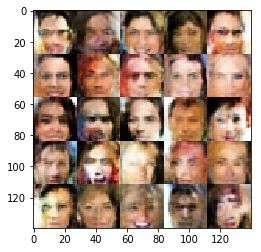

Epoch 0/1... Discriminator Loss: 1.0652... Generator Loss: 1.1118
Epoch 0/1... Discriminator Loss: 1.6739... Generator Loss: 0.4531
Epoch 0/1... Discriminator Loss: 1.2169... Generator Loss: 0.5391
Epoch 0/1... Discriminator Loss: 1.4092... Generator Loss: 0.6383
Epoch 0/1... Discriminator Loss: 1.4226... Generator Loss: 0.4730
Epoch 0/1... Discriminator Loss: 1.2374... Generator Loss: 0.5496
Epoch 0/1... Discriminator Loss: 1.4921... Generator Loss: 0.5945
Epoch 0/1... Discriminator Loss: 1.4292... Generator Loss: 0.5251
Epoch 0/1... Discriminator Loss: 1.1978... Generator Loss: 0.6940
Epoch 0/1... Discriminator Loss: 0.8714... Generator Loss: 1.2090


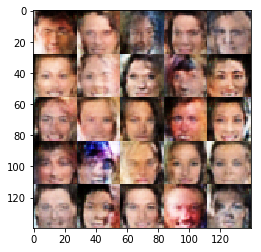

Epoch 0/1... Discriminator Loss: 0.9488... Generator Loss: 1.0681
Epoch 0/1... Discriminator Loss: 1.2974... Generator Loss: 0.7267
Epoch 0/1... Discriminator Loss: 1.3236... Generator Loss: 0.5991
Epoch 0/1... Discriminator Loss: 1.3777... Generator Loss: 0.6027
Epoch 0/1... Discriminator Loss: 0.9088... Generator Loss: 1.4910
Epoch 0/1... Discriminator Loss: 1.3395... Generator Loss: 0.9043
Epoch 0/1... Discriminator Loss: 1.0164... Generator Loss: 1.3499
Epoch 0/1... Discriminator Loss: 0.9828... Generator Loss: 1.0993
Epoch 0/1... Discriminator Loss: 1.4469... Generator Loss: 0.6403
Epoch 0/1... Discriminator Loss: 1.0481... Generator Loss: 1.4458


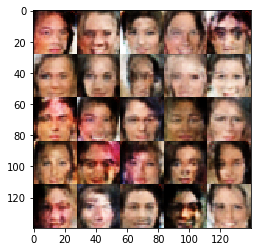

Epoch 0/1... Discriminator Loss: 1.2566... Generator Loss: 0.7248
Epoch 0/1... Discriminator Loss: 1.2020... Generator Loss: 0.7893
Epoch 0/1... Discriminator Loss: 1.1378... Generator Loss: 0.9387
Epoch 0/1... Discriminator Loss: 1.4653... Generator Loss: 0.4572
Epoch 0/1... Discriminator Loss: 0.9709... Generator Loss: 1.3825
Epoch 0/1... Discriminator Loss: 1.3714... Generator Loss: 0.7722
Epoch 0/1... Discriminator Loss: 1.3296... Generator Loss: 0.5938
Epoch 0/1... Discriminator Loss: 1.3927... Generator Loss: 0.4958
Epoch 0/1... Discriminator Loss: 1.3465... Generator Loss: 0.7295
Epoch 0/1... Discriminator Loss: 1.5028... Generator Loss: 0.5364


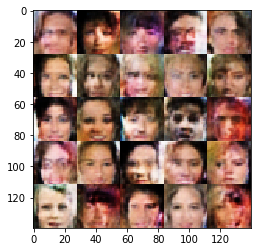

Epoch 0/1... Discriminator Loss: 1.1496... Generator Loss: 0.8122
Epoch 0/1... Discriminator Loss: 1.3999... Generator Loss: 0.5943
Epoch 0/1... Discriminator Loss: 1.3594... Generator Loss: 0.8459
Epoch 0/1... Discriminator Loss: 1.5291... Generator Loss: 0.6479
Epoch 0/1... Discriminator Loss: 1.2160... Generator Loss: 1.1727
Epoch 0/1... Discriminator Loss: 1.6200... Generator Loss: 0.5505
Epoch 0/1... Discriminator Loss: 0.8473... Generator Loss: 1.3127
Epoch 0/1... Discriminator Loss: 1.5189... Generator Loss: 0.4234
Epoch 0/1... Discriminator Loss: 1.3180... Generator Loss: 0.6764
Epoch 0/1... Discriminator Loss: 1.4344... Generator Loss: 0.5700


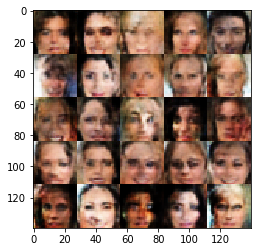

Epoch 0/1... Discriminator Loss: 1.4508... Generator Loss: 0.4464
Epoch 0/1... Discriminator Loss: 1.4842... Generator Loss: 0.5227
Epoch 0/1... Discriminator Loss: 1.3871... Generator Loss: 0.6215
Epoch 0/1... Discriminator Loss: 1.5269... Generator Loss: 0.6366
Epoch 0/1... Discriminator Loss: 1.3462... Generator Loss: 0.6631
Epoch 0/1... Discriminator Loss: 1.2715... Generator Loss: 0.8205
Epoch 0/1... Discriminator Loss: 0.9544... Generator Loss: 1.1191
Epoch 0/1... Discriminator Loss: 1.2557... Generator Loss: 0.7714
Epoch 0/1... Discriminator Loss: 1.4844... Generator Loss: 0.5067
Epoch 0/1... Discriminator Loss: 1.4823... Generator Loss: 0.5653


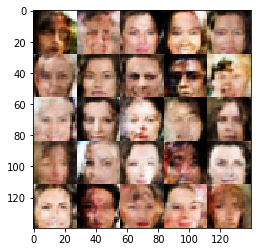

Epoch 0/1... Discriminator Loss: 1.2598... Generator Loss: 1.1053
Epoch 0/1... Discriminator Loss: 1.4034... Generator Loss: 0.6049
Epoch 0/1... Discriminator Loss: 1.0870... Generator Loss: 0.9902
Epoch 0/1... Discriminator Loss: 1.3935... Generator Loss: 0.6383
Epoch 0/1... Discriminator Loss: 1.2081... Generator Loss: 0.9344
Epoch 0/1... Discriminator Loss: 1.2659... Generator Loss: 0.7830
Epoch 0/1... Discriminator Loss: 1.5651... Generator Loss: 0.5095
Epoch 0/1... Discriminator Loss: 1.1498... Generator Loss: 0.8486
Epoch 0/1... Discriminator Loss: 1.3803... Generator Loss: 0.5437
Epoch 0/1... Discriminator Loss: 1.6484... Generator Loss: 0.4627


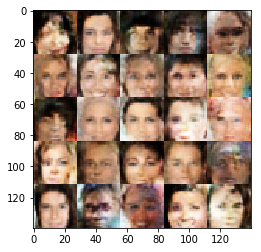

Epoch 0/1... Discriminator Loss: 1.3364... Generator Loss: 0.6143
Epoch 0/1... Discriminator Loss: 1.3105... Generator Loss: 0.7109
Epoch 0/1... Discriminator Loss: 1.3474... Generator Loss: 0.6962
Epoch 0/1... Discriminator Loss: 0.9634... Generator Loss: 1.4495
Epoch 0/1... Discriminator Loss: 1.3440... Generator Loss: 0.5603
Epoch 0/1... Discriminator Loss: 1.3324... Generator Loss: 0.5995
Epoch 0/1... Discriminator Loss: 1.3119... Generator Loss: 1.1976
Epoch 0/1... Discriminator Loss: 1.3728... Generator Loss: 0.6314
Epoch 0/1... Discriminator Loss: 1.2792... Generator Loss: 0.7261
Epoch 0/1... Discriminator Loss: 1.5323... Generator Loss: 0.4748


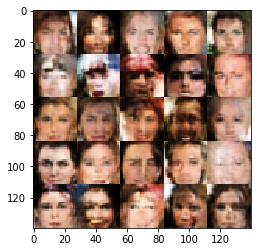

Epoch 0/1... Discriminator Loss: 1.4725... Generator Loss: 0.5334
Epoch 0/1... Discriminator Loss: 1.5242... Generator Loss: 0.5398
Epoch 0/1... Discriminator Loss: 1.4195... Generator Loss: 0.4965
Epoch 0/1... Discriminator Loss: 1.4384... Generator Loss: 0.5857
Epoch 0/1... Discriminator Loss: 1.3683... Generator Loss: 0.5403
Epoch 0/1... Discriminator Loss: 1.2044... Generator Loss: 0.8817
Epoch 0/1... Discriminator Loss: 1.2762... Generator Loss: 0.7456
Epoch 0/1... Discriminator Loss: 1.3444... Generator Loss: 0.6960
Epoch 0/1... Discriminator Loss: 1.2991... Generator Loss: 0.6499
Epoch 0/1... Discriminator Loss: 1.4481... Generator Loss: 0.6003


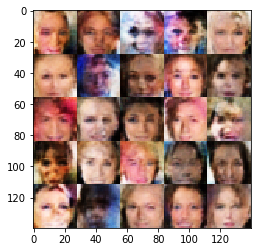

Epoch 0/1... Discriminator Loss: 1.2868... Generator Loss: 0.6414
Epoch 0/1... Discriminator Loss: 1.2071... Generator Loss: 0.7902
Epoch 0/1... Discriminator Loss: 1.2306... Generator Loss: 0.8561
Epoch 0/1... Discriminator Loss: 1.3456... Generator Loss: 0.6893
Epoch 0/1... Discriminator Loss: 1.3571... Generator Loss: 0.6354
Epoch 0/1... Discriminator Loss: 1.3917... Generator Loss: 0.5973
Epoch 0/1... Discriminator Loss: 1.5318... Generator Loss: 0.5541
Epoch 0/1... Discriminator Loss: 1.3651... Generator Loss: 0.7184
Epoch 0/1... Discriminator Loss: 1.4253... Generator Loss: 0.7128
Epoch 0/1... Discriminator Loss: 1.0284... Generator Loss: 1.1872


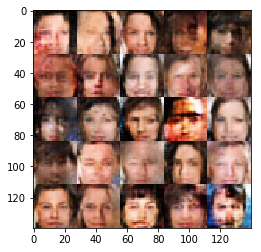

Epoch 0/1... Discriminator Loss: 0.8526... Generator Loss: 1.0561
Epoch 0/1... Discriminator Loss: 1.3609... Generator Loss: 0.6220
Epoch 0/1... Discriminator Loss: 1.4539... Generator Loss: 0.5255
Epoch 0/1... Discriminator Loss: 1.2649... Generator Loss: 0.7017
Epoch 0/1... Discriminator Loss: 1.3422... Generator Loss: 0.6822
Epoch 0/1... Discriminator Loss: 1.5642... Generator Loss: 0.3861
Epoch 0/1... Discriminator Loss: 1.4998... Generator Loss: 0.5214
Epoch 0/1... Discriminator Loss: 1.3603... Generator Loss: 0.5682
Epoch 0/1... Discriminator Loss: 0.8631... Generator Loss: 1.4247
Epoch 0/1... Discriminator Loss: 1.6127... Generator Loss: 0.4701


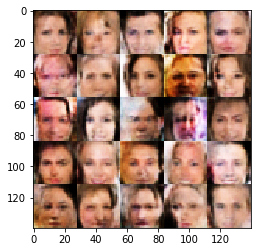

Epoch 0/1... Discriminator Loss: 1.2348... Generator Loss: 0.8413
Epoch 0/1... Discriminator Loss: 1.2777... Generator Loss: 0.7693
Epoch 0/1... Discriminator Loss: 1.7464... Generator Loss: 0.3522
Epoch 0/1... Discriminator Loss: 0.9876... Generator Loss: 1.0015
Epoch 0/1... Discriminator Loss: 1.3567... Generator Loss: 0.9713
Epoch 0/1... Discriminator Loss: 1.5711... Generator Loss: 0.6157
Epoch 0/1... Discriminator Loss: 1.3953... Generator Loss: 0.6790
Epoch 0/1... Discriminator Loss: 1.4884... Generator Loss: 0.7105
Epoch 0/1... Discriminator Loss: 1.1699... Generator Loss: 0.9548
Epoch 0/1... Discriminator Loss: 1.5382... Generator Loss: 0.5720


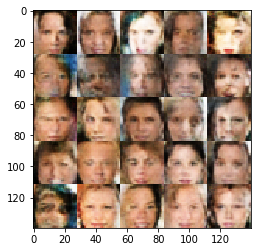

Epoch 0/1... Discriminator Loss: 1.3261... Generator Loss: 0.6524
Epoch 0/1... Discriminator Loss: 1.3035... Generator Loss: 0.6365
Epoch 0/1... Discriminator Loss: 1.2220... Generator Loss: 0.9464
Epoch 0/1... Discriminator Loss: 1.3885... Generator Loss: 0.5922
Epoch 0/1... Discriminator Loss: 1.4505... Generator Loss: 0.5634
Epoch 0/1... Discriminator Loss: 1.5210... Generator Loss: 0.5873
Epoch 0/1... Discriminator Loss: 1.2455... Generator Loss: 0.7321
Epoch 0/1... Discriminator Loss: 1.5168... Generator Loss: 0.4788
Epoch 0/1... Discriminator Loss: 1.5733... Generator Loss: 0.6053
Epoch 0/1... Discriminator Loss: 1.4873... Generator Loss: 0.6220


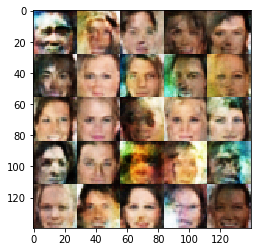

Epoch 0/1... Discriminator Loss: 1.4466... Generator Loss: 0.7154
Epoch 0/1... Discriminator Loss: 1.2391... Generator Loss: 0.8058
Epoch 0/1... Discriminator Loss: 1.6470... Generator Loss: 0.5361
Epoch 0/1... Discriminator Loss: 1.2872... Generator Loss: 0.8516
Epoch 0/1... Discriminator Loss: 1.3229... Generator Loss: 0.6630
Epoch 0/1... Discriminator Loss: 1.4288... Generator Loss: 0.6618
Epoch 0/1... Discriminator Loss: 1.4214... Generator Loss: 0.5254
Epoch 0/1... Discriminator Loss: 1.3928... Generator Loss: 0.6159
Epoch 0/1... Discriminator Loss: 1.5161... Generator Loss: 0.5655
Epoch 0/1... Discriminator Loss: 1.4353... Generator Loss: 0.6953


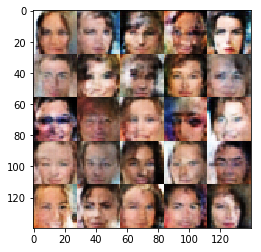

Epoch 0/1... Discriminator Loss: 1.4325... Generator Loss: 0.7607
Epoch 0/1... Discriminator Loss: 1.3237... Generator Loss: 0.7678
Epoch 0/1... Discriminator Loss: 1.3499... Generator Loss: 0.6841
Epoch 0/1... Discriminator Loss: 1.3049... Generator Loss: 0.6746
Epoch 0/1... Discriminator Loss: 0.9996... Generator Loss: 0.7850
Epoch 0/1... Discriminator Loss: 1.4040... Generator Loss: 0.5879
Epoch 0/1... Discriminator Loss: 1.2052... Generator Loss: 1.0088
Epoch 0/1... Discriminator Loss: 1.3257... Generator Loss: 0.7451
Epoch 0/1... Discriminator Loss: 1.4586... Generator Loss: 0.5303
Epoch 0/1... Discriminator Loss: 1.4150... Generator Loss: 0.5827


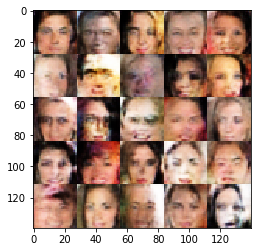

Epoch 0/1... Discriminator Loss: 1.3819... Generator Loss: 0.6215
Epoch 0/1... Discriminator Loss: 0.9597... Generator Loss: 1.7168
Epoch 0/1... Discriminator Loss: 1.4009... Generator Loss: 0.6291
Epoch 0/1... Discriminator Loss: 1.3276... Generator Loss: 0.5173
Epoch 0/1... Discriminator Loss: 1.3459... Generator Loss: 0.6124
Epoch 0/1... Discriminator Loss: 1.3935... Generator Loss: 1.1031
Epoch 0/1... Discriminator Loss: 1.3591... Generator Loss: 0.6621
Epoch 0/1... Discriminator Loss: 1.5182... Generator Loss: 0.5242
Epoch 0/1... Discriminator Loss: 1.3641... Generator Loss: 0.6359
Epoch 0/1... Discriminator Loss: 1.4409... Generator Loss: 0.6242


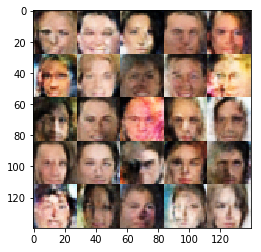

Epoch 0/1... Discriminator Loss: 1.4955... Generator Loss: 0.7019
Epoch 0/1... Discriminator Loss: 1.5300... Generator Loss: 0.4965
Epoch 0/1... Discriminator Loss: 1.3577... Generator Loss: 0.6523
Epoch 0/1... Discriminator Loss: 1.4255... Generator Loss: 0.5987
Epoch 0/1... Discriminator Loss: 1.3641... Generator Loss: 0.7118
Epoch 0/1... Discriminator Loss: 1.4603... Generator Loss: 0.6821
Epoch 0/1... Discriminator Loss: 1.3765... Generator Loss: 0.5815
Epoch 0/1... Discriminator Loss: 1.5758... Generator Loss: 0.6559
Epoch 0/1... Discriminator Loss: 1.3095... Generator Loss: 0.7831
Epoch 0/1... Discriminator Loss: 1.5182... Generator Loss: 0.5367


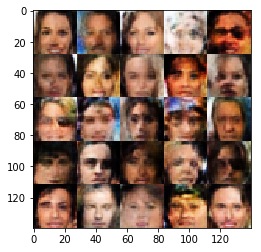

Epoch 0/1... Discriminator Loss: 1.4441... Generator Loss: 0.5674
Epoch 0/1... Discriminator Loss: 1.4322... Generator Loss: 0.5355
Epoch 0/1... Discriminator Loss: 1.5144... Generator Loss: 0.6004
Epoch 0/1... Discriminator Loss: 1.3332... Generator Loss: 0.7830
Epoch 0/1... Discriminator Loss: 1.4089... Generator Loss: 0.5559
Epoch 0/1... Discriminator Loss: 1.2619... Generator Loss: 0.8738
Epoch 0/1... Discriminator Loss: 1.2835... Generator Loss: 0.6959
Epoch 0/1... Discriminator Loss: 1.4813... Generator Loss: 0.5597
Epoch 0/1... Discriminator Loss: 1.5519... Generator Loss: 0.7661
Epoch 0/1... Discriminator Loss: 1.4137... Generator Loss: 0.5947


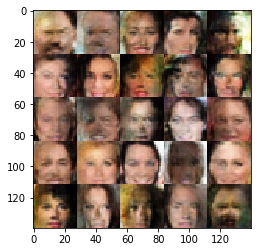

Epoch 0/1... Discriminator Loss: 1.3855... Generator Loss: 0.9685
Epoch 0/1... Discriminator Loss: 1.4382... Generator Loss: 0.5571
Epoch 0/1... Discriminator Loss: 1.6294... Generator Loss: 0.4504
Epoch 0/1... Discriminator Loss: 1.5649... Generator Loss: 0.5833
Epoch 0/1... Discriminator Loss: 1.2808... Generator Loss: 0.6637
Epoch 0/1... Discriminator Loss: 1.3193... Generator Loss: 0.7250
Epoch 0/1... Discriminator Loss: 1.3944... Generator Loss: 0.7030
Epoch 0/1... Discriminator Loss: 1.1102... Generator Loss: 1.0244
Epoch 0/1... Discriminator Loss: 1.3032... Generator Loss: 0.6844
Epoch 0/1... Discriminator Loss: 1.4827... Generator Loss: 0.6518


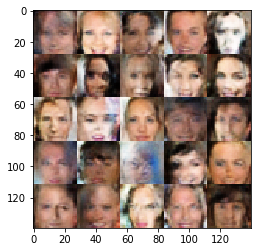

Epoch 0/1... Discriminator Loss: 1.4938... Generator Loss: 0.5958
Epoch 0/1... Discriminator Loss: 1.3073... Generator Loss: 1.0032
Epoch 0/1... Discriminator Loss: 1.3938... Generator Loss: 0.5666
Epoch 0/1... Discriminator Loss: 1.4530... Generator Loss: 0.5328
Epoch 0/1... Discriminator Loss: 1.4513... Generator Loss: 0.5684
Epoch 0/1... Discriminator Loss: 1.5015... Generator Loss: 0.5299
Epoch 0/1... Discriminator Loss: 1.3270... Generator Loss: 0.5924
Epoch 0/1... Discriminator Loss: 1.5195... Generator Loss: 0.3986
Epoch 0/1... Discriminator Loss: 1.5551... Generator Loss: 0.5493
Epoch 0/1... Discriminator Loss: 1.4859... Generator Loss: 0.5631


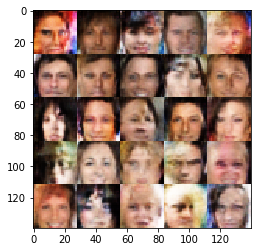

Epoch 0/1... Discriminator Loss: 1.3373... Generator Loss: 0.6733
Epoch 0/1... Discriminator Loss: 1.2823... Generator Loss: 0.7058
Epoch 0/1... Discriminator Loss: 1.4179... Generator Loss: 0.5976
Epoch 0/1... Discriminator Loss: 0.8785... Generator Loss: 1.1176
Epoch 0/1... Discriminator Loss: 1.2843... Generator Loss: 0.9243
Epoch 0/1... Discriminator Loss: 1.5386... Generator Loss: 0.6303
Epoch 0/1... Discriminator Loss: 1.5123... Generator Loss: 0.5164
Epoch 0/1... Discriminator Loss: 1.4735... Generator Loss: 0.4952
Epoch 0/1... Discriminator Loss: 1.3411... Generator Loss: 0.7718
Epoch 0/1... Discriminator Loss: 1.4433... Generator Loss: 0.7227


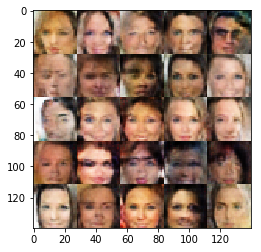

Epoch 0/1... Discriminator Loss: 1.1854... Generator Loss: 1.0289
Epoch 0/1... Discriminator Loss: 1.4266... Generator Loss: 0.7995
Epoch 0/1... Discriminator Loss: 1.4624... Generator Loss: 0.5548
Epoch 0/1... Discriminator Loss: 1.4677... Generator Loss: 0.6242
Epoch 0/1... Discriminator Loss: 1.5081... Generator Loss: 0.6351
Epoch 0/1... Discriminator Loss: 1.1251... Generator Loss: 0.8093
Epoch 0/1... Discriminator Loss: 1.3533... Generator Loss: 0.6832
Epoch 0/1... Discriminator Loss: 1.3488... Generator Loss: 0.6225
Epoch 0/1... Discriminator Loss: 1.4734... Generator Loss: 0.5734
Epoch 0/1... Discriminator Loss: 1.4133... Generator Loss: 0.6110


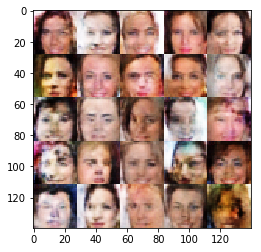

Epoch 0/1... Discriminator Loss: 1.4021... Generator Loss: 0.5947
Epoch 0/1... Discriminator Loss: 1.4893... Generator Loss: 0.5367
Epoch 0/1... Discriminator Loss: 1.5004... Generator Loss: 0.5763
Epoch 0/1... Discriminator Loss: 1.3538... Generator Loss: 0.7158
Epoch 0/1... Discriminator Loss: 1.3488... Generator Loss: 0.6572
Epoch 0/1... Discriminator Loss: 1.4558... Generator Loss: 0.5530
Epoch 0/1... Discriminator Loss: 1.4748... Generator Loss: 0.5892
Epoch 0/1... Discriminator Loss: 1.4727... Generator Loss: 0.5779
Epoch 0/1... Discriminator Loss: 1.4368... Generator Loss: 0.6966
Epoch 0/1... Discriminator Loss: 1.4508... Generator Loss: 0.6651


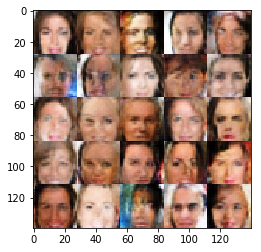

Epoch 0/1... Discriminator Loss: 1.3298... Generator Loss: 0.5818
Epoch 0/1... Discriminator Loss: 1.3985... Generator Loss: 0.6555
Epoch 0/1... Discriminator Loss: 1.4235... Generator Loss: 0.6633
Epoch 0/1... Discriminator Loss: 1.5095... Generator Loss: 0.6016
Epoch 0/1... Discriminator Loss: 1.3859... Generator Loss: 0.6264
Epoch 0/1... Discriminator Loss: 1.3855... Generator Loss: 0.6387
Epoch 0/1... Discriminator Loss: 1.5374... Generator Loss: 0.5387
Epoch 0/1... Discriminator Loss: 1.5054... Generator Loss: 0.5858
Epoch 0/1... Discriminator Loss: 1.5692... Generator Loss: 0.5253
Epoch 0/1... Discriminator Loss: 1.4055... Generator Loss: 0.6459


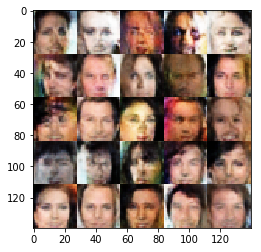

Epoch 0/1... Discriminator Loss: 1.5254... Generator Loss: 0.5772
Epoch 0/1... Discriminator Loss: 1.2804... Generator Loss: 0.6817
Epoch 0/1... Discriminator Loss: 1.2484... Generator Loss: 0.7663
Epoch 0/1... Discriminator Loss: 1.3778... Generator Loss: 0.6155
Epoch 0/1... Discriminator Loss: 1.5792... Generator Loss: 0.6333
Epoch 0/1... Discriminator Loss: 1.2814... Generator Loss: 0.6927
Epoch 0/1... Discriminator Loss: 1.4955... Generator Loss: 0.6932
Epoch 0/1... Discriminator Loss: 1.4797... Generator Loss: 0.5723
Epoch 0/1... Discriminator Loss: 1.4007... Generator Loss: 0.6185
Epoch 0/1... Discriminator Loss: 1.4220... Generator Loss: 0.7190


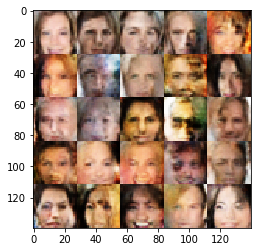

Epoch 0/1... Discriminator Loss: 1.3679... Generator Loss: 0.6416
Epoch 0/1... Discriminator Loss: 1.1613... Generator Loss: 0.9900
Epoch 0/1... Discriminator Loss: 1.5047... Generator Loss: 0.6155
Epoch 0/1... Discriminator Loss: 1.3776... Generator Loss: 0.5622
Epoch 0/1... Discriminator Loss: 1.4818... Generator Loss: 0.5821
Epoch 0/1... Discriminator Loss: 1.5022... Generator Loss: 0.5894
Epoch 0/1... Discriminator Loss: 1.4550... Generator Loss: 0.5334
Epoch 0/1... Discriminator Loss: 1.4111... Generator Loss: 0.6142
Epoch 0/1... Discriminator Loss: 1.3549... Generator Loss: 0.6746
Epoch 0/1... Discriminator Loss: 1.4198... Generator Loss: 0.6512


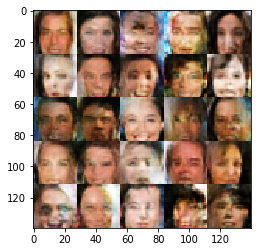

Epoch 0/1... Discriminator Loss: 1.6081... Generator Loss: 0.5023
Epoch 0/1... Discriminator Loss: 1.4296... Generator Loss: 0.6115
Epoch 0/1... Discriminator Loss: 1.4033... Generator Loss: 0.5963
Epoch 0/1... Discriminator Loss: 1.5764... Generator Loss: 0.5439
Epoch 0/1... Discriminator Loss: 1.5517... Generator Loss: 0.5310
Epoch 0/1... Discriminator Loss: 1.4131... Generator Loss: 0.6131
Epoch 0/1... Discriminator Loss: 1.5583... Generator Loss: 0.5021
Epoch 0/1... Discriminator Loss: 1.3793... Generator Loss: 0.6667
Epoch 0/1... Discriminator Loss: 1.4367... Generator Loss: 0.5682
Epoch 0/1... Discriminator Loss: 1.3874... Generator Loss: 0.6921


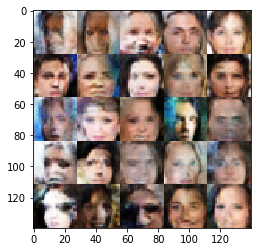

Epoch 0/1... Discriminator Loss: 1.5905... Generator Loss: 0.5476
Epoch 0/1... Discriminator Loss: 1.3774... Generator Loss: 0.6307
Epoch 0/1... Discriminator Loss: 1.3999... Generator Loss: 0.6053
Epoch 0/1... Discriminator Loss: 1.6059... Generator Loss: 0.5140
Epoch 0/1... Discriminator Loss: 1.4287... Generator Loss: 0.6887
Epoch 0/1... Discriminator Loss: 1.3363... Generator Loss: 0.6394
Epoch 0/1... Discriminator Loss: 1.1966... Generator Loss: 0.6954
Epoch 0/1... Discriminator Loss: 1.4276... Generator Loss: 0.5989
Epoch 0/1... Discriminator Loss: 1.3908... Generator Loss: 0.6566
Epoch 0/1... Discriminator Loss: 1.6250... Generator Loss: 0.7199


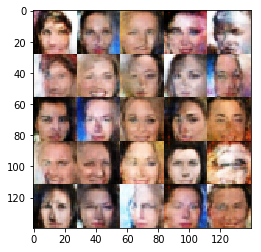

Epoch 0/1... Discriminator Loss: 1.4338... Generator Loss: 0.8712
Epoch 0/1... Discriminator Loss: 1.5280... Generator Loss: 0.5591
Epoch 0/1... Discriminator Loss: 1.4253... Generator Loss: 0.7205
Epoch 0/1... Discriminator Loss: 1.5816... Generator Loss: 0.5041
Epoch 0/1... Discriminator Loss: 1.3839... Generator Loss: 0.6232
Epoch 0/1... Discriminator Loss: 1.5063... Generator Loss: 0.5970
Epoch 0/1... Discriminator Loss: 1.5083... Generator Loss: 0.6021
Epoch 0/1... Discriminator Loss: 1.4341... Generator Loss: 0.6471
Epoch 0/1... Discriminator Loss: 1.4542... Generator Loss: 0.5921
Epoch 0/1... Discriminator Loss: 1.5307... Generator Loss: 0.6078


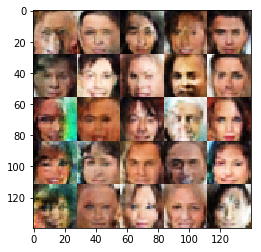

Epoch 0/1... Discriminator Loss: 1.5803... Generator Loss: 0.6078
Epoch 0/1... Discriminator Loss: 1.4944... Generator Loss: 0.5623
Epoch 0/1... Discriminator Loss: 1.5070... Generator Loss: 0.5041
Epoch 0/1... Discriminator Loss: 1.4611... Generator Loss: 0.5896
Epoch 0/1... Discriminator Loss: 1.3847... Generator Loss: 0.6997
Epoch 0/1... Discriminator Loss: 1.4566... Generator Loss: 0.6511
Epoch 0/1... Discriminator Loss: 1.5299... Generator Loss: 0.5510
Epoch 0/1... Discriminator Loss: 1.3178... Generator Loss: 0.7298
Epoch 0/1... Discriminator Loss: 1.4966... Generator Loss: 0.6252
Epoch 0/1... Discriminator Loss: 1.3458... Generator Loss: 0.6824


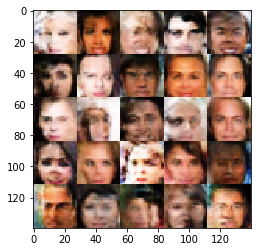

Epoch 0/1... Discriminator Loss: 1.4074... Generator Loss: 0.7713
Epoch 0/1... Discriminator Loss: 1.5253... Generator Loss: 0.5154
Epoch 0/1... Discriminator Loss: 1.5257... Generator Loss: 0.4897
Epoch 0/1... Discriminator Loss: 1.4100... Generator Loss: 0.6309
Epoch 0/1... Discriminator Loss: 1.2731... Generator Loss: 0.7969
Epoch 0/1... Discriminator Loss: 1.4635... Generator Loss: 0.5151
Epoch 0/1... Discriminator Loss: 1.4417... Generator Loss: 0.5174
Epoch 0/1... Discriminator Loss: 1.4572... Generator Loss: 0.6502
Epoch 0/1... Discriminator Loss: 1.4510... Generator Loss: 0.6306
Epoch 0/1... Discriminator Loss: 1.4275... Generator Loss: 0.6024


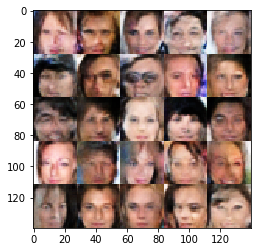

Epoch 0/1... Discriminator Loss: 1.4948... Generator Loss: 0.5836
Epoch 0/1... Discriminator Loss: 1.4979... Generator Loss: 0.4705
Epoch 0/1... Discriminator Loss: 1.4287... Generator Loss: 0.5399
Epoch 0/1... Discriminator Loss: 1.4716... Generator Loss: 0.5960
Epoch 0/1... Discriminator Loss: 1.3535... Generator Loss: 0.6315
Epoch 0/1... Discriminator Loss: 1.4370... Generator Loss: 0.5829
Epoch 0/1... Discriminator Loss: 1.4314... Generator Loss: 0.5908
Epoch 0/1... Discriminator Loss: 1.5210... Generator Loss: 0.5488
Epoch 0/1... Discriminator Loss: 1.4012... Generator Loss: 0.6471
Epoch 0/1... Discriminator Loss: 1.3129... Generator Loss: 0.6012


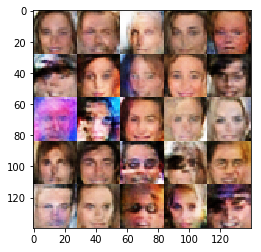

Epoch 0/1... Discriminator Loss: 1.4595... Generator Loss: 0.5877
Epoch 0/1... Discriminator Loss: 1.5355... Generator Loss: 0.6639
Epoch 0/1... Discriminator Loss: 1.3883... Generator Loss: 0.6524
Epoch 0/1... Discriminator Loss: 1.4952... Generator Loss: 0.6181
Epoch 0/1... Discriminator Loss: 1.2593... Generator Loss: 0.7252
Epoch 0/1... Discriminator Loss: 1.4393... Generator Loss: 0.5989
Epoch 0/1... Discriminator Loss: 1.3749... Generator Loss: 0.7432
Epoch 0/1... Discriminator Loss: 1.3876... Generator Loss: 0.6401
Epoch 0/1... Discriminator Loss: 1.4698... Generator Loss: 0.6072
Epoch 0/1... Discriminator Loss: 1.4753... Generator Loss: 0.6109


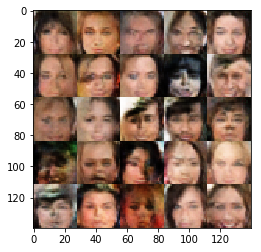

Epoch 0/1... Discriminator Loss: 1.3550... Generator Loss: 0.7237
Epoch 0/1... Discriminator Loss: 1.4710... Generator Loss: 0.6737
Epoch 0/1... Discriminator Loss: 1.2905... Generator Loss: 0.6920
Epoch 0/1... Discriminator Loss: 1.4367... Generator Loss: 0.6232


In [14]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

tf.reset_default_graph()

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.